# Face Detection Project

## Importing Dataset

### wider_face

We take from the server 100 rows of examples for training set, validation set and test set of the dataset ***wider_face***. We create three dataFrame with pandas library which help us to give an idea of how the dataset is composed

In [1]:
import zipfile
import os
import datasets
import requests
import pandas as pd


# URL requests used to pick the first 100 rows of the dataset from the server
API_URL_TRAIN = "https://datasets-server.huggingface.co/first-rows?dataset=wider_face&config=default&split=train"
API_URL_VALIDATION = "https://datasets-server.huggingface.co/first-rows?dataset=wider_face&config=default&split=validation"
API_URL_TEST = "https://datasets-server.huggingface.co/first-rows?dataset=wider_face&config=default&split=test"

'''
Function that picks an URL request and returns a json objects which contains each object and its correspondent attributes
'''
def query(URL):
    response = requests.request("GET", URL)
    return response.json()

# storing the json for the training, validation and testing set 
first_rows_data_train = query(API_URL_TRAIN)
first_rows_data_validation = query(API_URL_VALIDATION)
first_rows_data_test = query(API_URL_TEST)



'''
Function that picks a json object and returns a dataframe which contains an image object for each row and an attribute for each column
'''
def create_dataframe_first_rows(data):
    
    # lists which stores the field for each object
    src, height, width, bbox, blur, expression, illumination, occlusion, pose, invalid, trucated_cells = [], [], [], [], [], [], [], [], [], [], []
    n_images = len(data["rows"])
    
    # saving all the fields for each row image object
    for i in range(n_images):
        result = data["rows"][i]["row"]

        image = result["image"]
        src.append(image["src"])
        height.append(image["height"])
        width.append(image["width"])

        attribute_faces = result["faces"]
        bbox.append(attribute_faces["bbox"])
        blur.append(attribute_faces["blur"])
        expression.append(attribute_faces["expression"])
        illumination.append(attribute_faces["illumination"])
        occlusion.append(attribute_faces["occlusion"])
        pose.append(attribute_faces["pose"])
        invalid.append(attribute_faces["invalid"])

    # creation of the dataframe giving the lists
    columns_titles = [('image', 'src'), ("image", 'height'), ("image", 'width'), 
                      ('faces','bbox'), ("faces", 'blur'),('faces', 'expression'), 
                      ('faces', 'illumination'), ("faces",'occlusion'), ('faces','pose'), 
                      ('faces','invalid'), ("faces",'trucated_cells')]
    col_list = pd.MultiIndex.from_tuples(columns_titles)
    df = pd.DataFrame([src, height, width, bbox, blur, expression, illumination, occlusion, pose, invalid, trucated_cells], col_list).transpose()
    
    return df


# saving the dataframe for the first 100 rows of training, validation and testing set
first_row_df_train = create_dataframe_first_rows(first_rows_data_train)
first_row_df_validation = create_dataframe_first_rows(first_rows_data_validation)
first_row_df_test = create_dataframe_first_rows(first_rows_data_test)


# showing an example of dataframe produced
first_row_df_train

image               \
                                                  src height width   
0   https://datasets-server.huggingface.co/assets/...   1385  1024   
1   https://datasets-server.huggingface.co/assets/...   1432  1024   
2   https://datasets-server.huggingface.co/assets/...    768  1024   
3   https://datasets-server.huggingface.co/assets/...    682  1024   
4   https://datasets-server.huggingface.co/assets/...    852  1024   
..                                                ...    ...   ...   
95  https://datasets-server.huggingface.co/assets/...    679  1024   
96  https://datasets-server.huggingface.co/assets/...    768  1024   
97  https://datasets-server.huggingface.co/assets/...    984  1024   
98  https://datasets-server.huggingface.co/assets/...    681  1024   
99  https://datasets-server.huggingface.co/assets/...    847  1024   

                                                faces  \
                                                 bbox   
0                      [[449.0, 330.0, 122.0, 149.0]]   
1                       [[361.0, 98.0, 263.0, 339.0]]   
2   [[78.0, 221.0, 7.0, 8.0], [78.0, 238.0, 14.0, ...   
3   [[69.0, 359.0, 50.0, 36.0], [227.0, 382.0, 56....   
4   [[27.0, 226.0, 33.0, 36.0], [63.0, 95.0, 16.0,...   
..                                                ...   
95  [[903.0, 245.0, 45.0, 53.0], [735.0, 254.0, 36...   
96  [[70.0, 425.0, 17.0, 19.0], [129.0, 463.0, 21....   
97  [[4.0, 289.0, 21.0, 24.0], [1.0, 323.0, 21.0, ...   
98  [[961.0, 453.0, 12.0, 14.0], [986.0, 400.0, 12...   
99  [[798.0, 112.0, 52.0, 66.0], [653.0, 108.0, 52...   

                                                       \
                                                 blur   
0                                                 [0]   
1                                                 [0]   
2   [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...   
3                         [1, 1, 1, 2, 1, 2, 2, 2, 1]   
4   [1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, ...   
..                                                ...   
95   [1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2]   
96         [1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2]   
97  [2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, ...   
98               [1, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2]   
99               [0, 0, 0, 0, 0, 2, 1, 2, 2, 2, 2, 2]   

                                                       \
                                           expression   
0                                                 [0]   
1                                                 [0]   
2   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3                         [0, 0, 0, 0, 0, 0, 0, 0, 0]   
4   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
..                                                ...   
95   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   
96         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   
97  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
98               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   
99               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   

                                                       \
                                         illumination   
0                                                 [0]   
1                                                 [0]   
2   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...   
3                         [0, 1, 0, 0, 0, 0, 0, 0, 0]   
4   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
..                                                ...   
95   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   
96         [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   
97  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
98               [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]   
99               [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]   

                                                       \
                                            occlusion   
0                                                 [0]  

We import the dataset ***wider_face*** from *hugging face*: https://huggingface.co/datasets/wider_face

In [2]:
from datasets import load_dataset, Image


# Loading the dataset from the server
dataset_server = load_dataset("wider_face").cast_column("image", Image(decode=False))
dataset_local = load_dataset("widerFace", verification_mode='no_checks').cast_column("image", Image(decode=False))

Found cached dataset wider_face (C:/Users/lita4/.cache/huggingface/datasets/wider_face/default/1.0.0/b87ac8d8d65665ec6e3c2a5c6ec08d6fddb1b0f2d7f2dc3b5dcecdaf12adf22f)


  0%|          | 0/3 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/12881 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/3227 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/16098 [00:00<?, ?it/s]

Found cached dataset imagefolder (C:/Users/lita4/.cache/huggingface/datasets/imagefolder/default-d3d22de01261f641/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f)


  0%|          | 0/3 [00:00<?, ?it/s]

Now we creates three dataFrame objects for the training set, the validation set and the training set with the images that are imported from *Huggging Face*.
Some images weren't imported correctly, so we have deleted all the row in which the images isn't downoloaded in local

In [3]:
from pathlib import Path
from PIL import Image


"""
Function that, given a string correspondent to the path in which there is the image, truncates the path in order to obtain a local path.
The problem is that we can't retrieve easily an image through the global path, so we have preferred to obtain the local path
"""
def truncate_path(path):
    list_path = path.split("\\")
    list_new_path = []
    check = False
    
    for i in list_path:
        if check == True:
            list_new_path.append(i)
        if i == "AI_IVU_Project":
            check = True
            
    new_path = "\\".join(list_new_path)   
    return new_path



'''
Function that picks a datasets object and it returns a dataframe which contains an image object for each row and an attribute for each column

'''
def create_dataframe_from_server(dataset):
    
    # lists which stores the field for each object
    path, bbox, blur, expression, illumination, occlusion, pose, invalid, trucated_cells = [], [], [], [], [], [], [], [], []
    n_images = len(dataset)
        
        
    # saving all the fields for each row image object
    for i in range(n_images):

        image = dataset[i]["image"]
        path.append(image["path"])
        
        attribute_faces = dataset[i]["faces"]
        bbox.append(attribute_faces["bbox"])
        blur.append(attribute_faces["blur"])
        expression.append(attribute_faces["expression"])
        illumination.append(attribute_faces["illumination"])
        occlusion.append(attribute_faces["occlusion"])
        pose.append(attribute_faces["pose"])
        invalid.append(attribute_faces["invalid"])
        

    # creation of the dataframe giving the lists
    columns_titles = [('image', 'path'), 
                      ('faces','bbox'), ("faces", 'blur'),('faces', 'expression'), 
                      ('faces', 'illumination'), ("faces",'occlusion'), ('faces','pose'), 
                      ('faces','invalid'), ("faces",'trucated_cells')]
    col_list = pd.MultiIndex.from_tuples(columns_titles)
    df = pd.DataFrame([path, bbox, blur, expression, illumination, occlusion, pose, invalid, trucated_cells], col_list).transpose()
    
    # returning the created dataframe
    return df



'''
Function that picks a datasets object from local and it returns a dataframe which contains an image object for each row and an attribute for each column
'''
def create_dataframe_from_local(dataset):
    
    # lists which stores the field for each object
    path = []
    n_images = len(dataset)
        
    #initial_path = r"D:\\AppuntiUniversita'\Magistrale\Secondo anno\Secondo Semestre\Image and Video Understanding\AI_IVU_Project\widerFace\data"
    
    # saving all the fields for each row image object
    for i in range(n_images):

        image = dataset[i]["image"]
        image["path"] = truncate_path(image["path"])
        path.append(image["path"])
            

    # creation of the dataframe giving the lists
    columns_titles = [('image', 'path')]
    col_list = pd.MultiIndex.from_tuples(columns_titles)
    df = pd.DataFrame([path], col_list).transpose()
    
    # returning the created dataframe
    return df



"""
Function that deletes from the database all the images that are not imported correctly through the load command
"""
def deleting_absent_images(df_server, df_local):
    indexes_to_delete = []
    images_paths = []
    
    # extracting the common prefix of the images paths in local  
    local_path = df_local["image"].iloc[0]["path"]
    splitted_local_path = local_path.split("\\")
    local_prefix_path = ""
    
    for i in range(len(splitted_local_path)-4):
        local_prefix_path += splitted_local_path[i] + "\\"
    
    # Checking for each row of the dataframe from server all the images that cannot be imported and opened from the local folder
    for i in range(len(df_server)):
        check = False
        server_path = df_server["image"].iloc[i]["path"]
        splitted_server_path = server_path.split("\\") 
        server_path = splitted_server_path[len(splitted_server_path) - 3] + "\\" + splitted_server_path[len(splitted_server_path) - 2] +"\\"
        splitted_last_part = splitted_server_path[len(splitted_server_path) - 1].split("/")
        server_path += splitted_last_part[0] + "\\" + splitted_last_part[1]
        image_path = local_prefix_path + server_path
        
        # catching the exceptions and saving each index every time it cannot open the image file
        try:
            img = Image.open(image_path)
            img.close()
            images_paths.append(image_path)
            
        except:
            indexes_to_delete.append(i)
     
    # producing the definitive dataframe by deleting the rows corresponding to the non-opened images and changing all the path columns with the local path
    df = df_server.drop(indexes_to_delete)
    df["image", "path"] = images_paths
    
    # returning the modified dataframe
    return df
    


"""
Function that creates the definitive dataframe with the local path of the images, the bounding boxes and the other features for train, validation and test dataset.
It uses the previous functions as auxiliary functions in order to create dataframes from local and server and then deleting the images that aren't imported correctly
"""    
def create_dataframe(dataset_server, dataset_local):
    
    # Dividing the dataset into training, validation and testing set
    dataset_server_train = dataset_server["train"]
    dataset_server_validation = dataset_server["validation"]
    dataset_server_test = dataset_server["test"]

    dataset_local_train = dataset_local["train"]
    dataset_local_validation = dataset_local["validation"]
    dataset_local_test = dataset_local["test"]
    
    # creating datasets by using the load command for the local folder and the server folder
    df_server_train = create_dataframe_from_server(dataset_server_train)
    df_server_validation = create_dataframe_from_server(dataset_server_validation)
    df_server_test = create_dataframe_from_server(dataset_server_test)
    
    df_local_train = create_dataframe_from_local(dataset_local_train)
    df_local_validation = create_dataframe_from_local(dataset_local_validation)
    df_local_test = create_dataframe_from_local(dataset_local_test)
    
    # creating the definitive datasets for train, validation and test by deleting all the images that are not correctly imported by the load command
    df_train = deleting_absent_images(df_server_train, df_local_train)
    df_validation = deleting_absent_images(df_server_validation, df_local_validation)
    df_test = deleting_absent_images(df_server_test, df_local_test)
    
    # Returning the training set, the velidation set and the test set daframes of the dataset wider_face
    return df_train, df_validation, df_test


df_train, df_validation, df_test = create_dataframe(dataset_server, dataset_local)

In [4]:
df_train

image  \
                                                    path   
0      widerFace\data\WIDER_train\images\0--Parade\0_...   
1      widerFace\data\WIDER_train\images\0--Parade\0_...   
2      widerFace\data\WIDER_train\images\0--Parade\0_...   
3      widerFace\data\WIDER_train\images\0--Parade\0_...   
4      widerFace\data\WIDER_train\images\0--Parade\0_...   
...                                                  ...   
12875  widerFace\data\WIDER_train\images\9--Press_Con...   
12876  widerFace\data\WIDER_train\images\9--Press_Con...   
12877  widerFace\data\WIDER_train\images\9--Press_Con...   
12878  widerFace\data\WIDER_train\images\9--Press_Con...   
12879  widerFace\data\WIDER_train\images\9--Press_Con...   

                                                   faces  \
                                                    bbox   
0                         [[449.0, 330.0, 122.0, 149.0]]   
1                          [[361.0, 98.0, 263.0, 339.0]]   
2      [[78.0, 221.0, 7.0, 8.0], [78.0, 238.0, 14.0, ...   
3      [[69.0, 359.0, 50.0, 36.0], [227.0, 382.0, 56....   
4      [[27.0, 226.0, 33.0, 36.0], [63.0, 95.0, 16.0,...   
...                                                  ...   
12875                     [[462.0, 140.0, 264.0, 362.0]]   
12876                     [[362.0, 108.0, 214.0, 277.0]]   
12877                     [[495.0, 222.0, 165.0, 222.0]]   
12878                      [[244.0, 46.0, 510.0, 614.0]]   
12879                     [[400.0, 150.0, 208.0, 290.0]]   

                                                          \
                                                    blur   
0                                                    [0]   
1                                                    [0]   
2      [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...   
3                            [1, 1, 1, 2, 1, 2, 2, 2, 1]   
4      [1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, ...   
...                                                  ...   
12875                                                [0]   
12876                                                [0]   
12877                                                [0]   
12878                                                [0]   
12879                                                [0]   

                                                          \
                                              expression   
0                                                    [0]   
1                                                    [0]   
2      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3                            [0, 0, 0, 0, 0, 0, 0, 0, 0]   
4      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
...                                                  ...   
12875                                                [0]   
12876                                                [0]   
12877                                                [0]   
12878                                                [0]   
12879                                                [0]   

                                                          \
                                            illumination   
0                                                    [0]   
1                                                    [0]   
2      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...   
3                            [0, 1, 0, 0, 0, 0, 0, 0, 0]   
4      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
...                                                  ...   
12875                                                [0]   
12876                                                [0]   
12877                                                [0]   
12878                                                [0]   
12879                                                [0]   

                                                          \
                                               occlusion   
0                         

In [5]:
df_validation

image  \
                                                   path   
0     widerFace\data\WIDER_val\images\0--Parade\0_Pa...   
1     widerFace\data\WIDER_val\images\0--Parade\0_Pa...   
2     widerFace\data\WIDER_val\images\0--Parade\0_Pa...   
3     widerFace\data\WIDER_val\images\0--Parade\0_Pa...   
4     widerFace\data\WIDER_val\images\0--Parade\0_Pa...   
...                                                 ...   
3221  widerFace\data\WIDER_val\images\9--Press_Confe...   
3222  widerFace\data\WIDER_val\images\9--Press_Confe...   
3223  widerFace\data\WIDER_val\images\9--Press_Confe...   
3224  widerFace\data\WIDER_val\images\9--Press_Confe...   
3225  widerFace\data\WIDER_val\images\9--Press_Confe...   

                                                  faces  \
                                                   bbox   
0     [[345.0, 211.0, 4.0, 4.0], [331.0, 126.0, 3.0,...   
1     [[26.0, 299.0, 10.0, 16.0], [25.0, 329.0, 7.0,...   
2     [[311.0, 131.0, 8.0, 9.0], [299.0, 143.0, 10.0...   
3     [[111.0, 425.0, 122.0, 127.0], [209.0, 347.0, ...   
4     [[281.0, 303.0, 20.0, 36.0], [260.0, 324.0, 16...   
...                                                 ...   
3221                     [[334.0, 182.0, 300.0, 400.0]]   
3222                     [[316.0, 224.0, 270.0, 347.0]]   
3223                     [[332.0, 172.0, 294.0, 372.0]]   
3224  [[336.0, 242.0, 152.0, 202.0], [712.0, 278.0, ...   
3225  [[218.0, 190.0, 112.0, 160.0], [302.0, 224.0, ...   

                                                         \
                                                   blur   
0     [2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, ...   
1     [2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 2, 1, ...   
2     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
3                                       [0, 0, 0, 0, 0]   
4     [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...   
...                                                 ...   
3221                                                [0]   
3222                                                [0]   
3223                                                [0]   
3224                                             [0, 0]   
3225                                          [0, 0, 1]   

                                                         \
                                             expression   
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3                                       [1, 1, 1, 1, 1]   
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...   
...                                                 ...   
3221                                                [0]   
3222                                                [0]   
3223                                                [0]   
3224                                             [0, 0]   
3225                                          [0, 0, 0]   

                                                         \
                                           illumination   
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, ...   
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3                                       [0, 0, 0, 0, 0]   
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
...                                                 ...   
3221                                                [0]   
3222                                                [1]   
3223                                                [0]   
3224                                             [0, 0]   
3225                                          [0, 0, 0]   

                                                         \
                                              occlusion   
0     [2, 0, 2, 0, 2, 0, 2, 2, 0, 1, 1, 0, 1, 0, 0, ...   
1     [2, 1, 1, 2, 2, 2, 2, 2, 0,

In [6]:
df_test

image faces       \
                                                    path  bbox blur   
0      widerFace\data\WIDER_test\images\0--Parade\0_P...    []   []   
1      widerFace\data\WIDER_test\images\0--Parade\0_P...    []   []   
2      widerFace\data\WIDER_test\images\0--Parade\0_P...    []   []   
3      widerFace\data\WIDER_test\images\0--Parade\0_P...    []   []   
4      widerFace\data\WIDER_test\images\0--Parade\0_P...    []   []   
...                                                  ...   ...  ...   
16092  widerFace\data\WIDER_test\images\9--Press_Conf...    []   []   
16093  widerFace\data\WIDER_test\images\9--Press_Conf...    []   []   
16094  widerFace\data\WIDER_test\images\9--Press_Conf...    []   []   
16095  widerFace\data\WIDER_test\images\9--Press_Conf...    []   []   
16096  widerFace\data\WIDER_test\images\9--Press_Conf...    []   []   

                                                                     
      expression illumination occlusion pose invalid trucated_cells  
0             []           []        []   []      []           None  
1             []           []        []   []      []           None  
2             []           []        []   []      []           None  
3             []           []        []   []      []           None  
4             []           []        []   []      []           None  
...          ...          ...       ...  ...     ...            ...  
16092         []           []        []   []      []           None  
16093         []           []        []   []      []           None  
16094         []           []        []   []      []           None  
16095         []           []        []   []      []           None  
16096         []           []        []   []      []           None  

[16097 rows x 9 columns]

### Natural Images

Download the folder of a new dataset with non-faces: https://www.kaggle.com/datasets/prasunroy/natural-images

This dataset is used mainly for retrieving easily some non-human images for training the Viola and Jones model

In [7]:
# Command used to install the opendatasets library
#!pip3 install opendatasets
#{"username":"tommasotalamo","key":"5c9430e1137c86e05db7c46b6cfcf6d3"}

import os
import shutil
import opendatasets as od

# Download the dataset into the NonFaces folder if it is not already done
if not os.path.exists("./NonFaces/"):
    od.download("https://www.kaggle.com/datasets/prasunroy/natural-images")
    

"""
Function that imports all non-face images from the dataset into the NonFace 
"""
def importNonFacesDataset():
    
    # Defining the root folder path where the downloaded dataset is located
    dataset_path = "./natural-images/"

    # Deleting useless folders
    data_folder_path = os.path.join(dataset_path, "data")
    if os.path.exists(data_folder_path):
        shutil.rmtree(data_folder_path)

    dataset_path = "./natural-images/natural_images/"
    data_folder_path = os.path.join(dataset_path, "person")
    if os.path.exists(data_folder_path):
        shutil.rmtree(data_folder_path)

         
    # Defining the root folder path where the downloaded dataset is located 
    dataset_path = "./natural-images/natural_images/"

    # Defining the path to the destination folder where we will copy the extracted images 
    destination_folder = "./NonFaces/"

    # Creating the destination folder if it doesn't exist 
    os.makedirs(destination_folder, exist_ok=True)

    # Browsing all subfolders of the "natural-image" folder 
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if file.endswith((".jpg", ".jpeg", ".png", ".gif")):
                source_file_path = os.path.join(root, file)
                destination_file_path = os.path.join(destination_folder, file)
                shutil.copy(source_file_path, destination_file_path)

    print("Extraction Completed")
    
    dataset_path = "./"
    
    #Delete useless folder
    data_folder_path = os.path.join(dataset_path, "natural-images")
    if os.path.exists(data_folder_path):
        shutil.rmtree(data_folder_path)
        
        
        
importNonFacesDataset()

Extraction Completed


# Pre-Processing for the images

We have implemented the pre-processing phase for both the models.
Pre-processing can be divided in the following steps:
* Resizing
* Reducing background noise
* Illumination gradient corrections
* Histogram equalization

In [8]:
# Command necessary for the installation of the opencv library
#!pip3 install opencv-python

import cv2
import numpy as np


"""
Function that resize an input image into inputs width and height and it returns the modified image
"""
def resize_image(image, width, height):
    target_size = (width,height)
    image_resized = image.resize(target_size)
    return image_resized 


"""
Function that applies a gaussianBlur filter to the input image which is converted into an array and it returns the modified image
"""
def denoise_image(image):
    image_np = np.array(image)
    denoised_image = cv2.GaussianBlur(image_np, (5, 5), 1)
    return denoised_image


"""
Function that applies histogram equalization to an input image and it returns the modified image
"""
def equalize_histogram(image):
    # Equalizza l'istogramma dell'immagine
    equalized_image = cv2.equalizeHist(image)
    return equalized_image


"""
Function that applies the pre-processing phase to an input image and it returns a pre-processed image in grey-scale color.
It uses the three previous functions as auxiliary functions for the application of all the steps for the pre-processing phase
"""
def processing(image, width, height):
    image_resized = resize_image(image, width, height)
    image_denoised = Image.fromarray(denoise_image(image_resized))
    image_gray = image_denoised.convert("L")
    image_processed = equalize_histogram(np.array(image_gray))
    return image_processed



# Viola and Jones

We build a Viola and Jones model by following the slides of the IVU lessons. The main characteristics that distinguish this model and that we have inserted are:
* **Integral images** for fast feature evaluation
* **Boosting** for feature selection
* **Attentional cascade** for fast rejection of non-face windows

## Preparing the dataset for the Viola & Jones model

Producing a training set in which we have 2000 faces to use for our new model.
From the training dataframe produced previously we have the bounding boxes of the faces into the various images. We create new images through that portions by using the opencv library.
We use only the first rows of the training set from the dataset *wider_face*, we can use the other rows for testing and comparing for the computation of the results

In [9]:
from os.path import exists


"""
Function that extracts 2000 portion of images with faces from the dataset "wider_face" by exploiting the bounding boxes of the training set
We return also the number of rows used for extracting faces from the dataframe of the training set of wider_face
"""
def producing_faces(df_train, start, end):
    new_paths = []
    check_faces = []
    j = start
    
    for i in range(len(df_train)):
        img = cv2.imread(df_train["image"]["path"][i])
        for bbox in df_train["faces"]["bbox"][i]:
            if j in range (start, end):
                x = int(bbox[0]) if int(bbox[0]) > 0 else 1
                y = int(bbox[1]) if int(bbox[1]) > 0 else 1
                h = int(bbox[2]) if int(bbox[2]) > 0 else 1
                w = int(bbox[3]) if int(bbox[3]) > 0 else 1

                new_path = "./Faces/Face_" + str(j) + ".jpg"
                if not exists(new_path):
                    crop_img = img[y:y+h, x:x+w]
                    cv2.imwrite(new_path, crop_img)
                    
                new_paths.append(new_path)
                check_faces.append(True)
                j+=1
                
            else:
                return pd.DataFrame(list(zip(new_paths, check_faces)), columns = ["path", "check_face"])
            
        
    return pd.DataFrame(list(zip(new_paths, check_faces)), columns = ["path", "check_face"])



df_train_faces = producing_faces(df_train, 0, 3500)
df_train_faces

path  check_face
0        ./Faces/Face_0.jpg        True
1        ./Faces/Face_1.jpg        True
2        ./Faces/Face_2.jpg        True
3        ./Faces/Face_3.jpg        True
4        ./Faces/Face_4.jpg        True
...                     ...         ...
3495  ./Faces/Face_3495.jpg        True
3496  ./Faces/Face_3496.jpg        True
3497  ./Faces/Face_3497.jpg        True
3498  ./Faces/Face_3498.jpg        True
3499  ./Faces/Face_3499.jpg        True

[3500 rows x 2 columns]

We insert some faces for the test set of the *Viola and Jones* model

In [10]:
df_test_faces = producing_faces(df_train, 3501, 4001)
df_test_faces

path  check_face
0    ./Faces/Face_3501.jpg        True
1    ./Faces/Face_3502.jpg        True
2    ./Faces/Face_3503.jpg        True
3    ./Faces/Face_3504.jpg        True
4    ./Faces/Face_3505.jpg        True
..                     ...         ...
495  ./Faces/Face_3996.jpg        True
496  ./Faces/Face_3997.jpg        True
497  ./Faces/Face_3998.jpg        True
498  ./Faces/Face_3999.jpg        True
499  ./Faces/Face_4000.jpg        True

[500 rows x 2 columns]

We insert also some ***non-face images*** into our training set and our test set (from an external dataset: *Natural Images - Kaggle*)
https://www.kaggle.com/datasets/prasunroy/natural-images

In [11]:
import pandas as pd
import random


"""
Auxiliary function used for extracting all the images path from the NonFace folder
"""
def get_image_paths(folder_path):
    image_paths = []
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                image_paths.append(os.path.join(root, file))
    return image_paths


"""
Function that adds non-faces image's rows from the dataset "natural images" which is stored into a folder called NonFaces
"""
def add_non_faces(df_train_faces, df_test_faces, folder_path, elem_to_extract):

    # Take path of images
    image_paths_non_faces = get_image_paths(folder_path)
    test_paths = random.sample(image_paths_non_faces, elem_to_extract)
    
    # Extracting the paths for the test set
    for elem in test_paths:
        image_paths_non_faces.remove(elem)

    # Create a dataframe with new data for training set
    new_data_train = {
        'path': df_train_faces["path"].tolist() + image_paths_non_faces,
        'check_face': df_train_faces["check_face"].tolist() + [False] * len(image_paths_non_faces)
    }
    
    # Create a dataframe with new data for test set with only non_faces
    new_data_test = {
        'path': df_test_faces["path"].tolist() + test_paths,
        'check_face': df_test_faces["check_face"].tolist() + [False] * len(test_paths)
    }
    
    return pd.DataFrame(new_data_train), pd.DataFrame(new_data_test)


df_train_ViolaJones, df_test_ViolaJones = add_non_faces(df_train_faces, df_test_faces, './NonFaces/', 10)
df_train_ViolaJones

path  check_face
0                ./Faces/Face_0.jpg        True
1                ./Faces/Face_1.jpg        True
2                ./Faces/Face_2.jpg        True
3                ./Faces/Face_3.jpg        True
4                ./Faces/Face_4.jpg        True
...                             ...         ...
9398  ./NonFaces/motorbike_0783.jpg       False
9399  ./NonFaces/motorbike_0784.jpg       False
9400  ./NonFaces/motorbike_0785.jpg       False
9401  ./NonFaces/motorbike_0786.jpg       False
9402  ./NonFaces/motorbike_0787.jpg       False

[9403 rows x 2 columns]

In [12]:
from PIL import Image
import os
import random
import cv2


"""
Function that creates sliding windows of specified size and step over an image

It takes in input:
    image (numpy.ndarray): The input image.
    window_size (tuple): Size of the sliding window as (height, width).
    step (int): Step size to move the window.

It returns a tuple containing x, y coordinates and the window image
"""
def create_window(image, window_size, step):
    height, width = image.shape[:2]

    for y in range(0, height - window_size[1] + 1, step):
        for x in range(0, width - window_size[0] + 1, step):
            yield x, y, image[y:y + window_size[1], x:x + window_size[0]]


"""
Function that saves a list of window images to the specified output folder

It takes in input three patameters:
    images (list): List of window images.
    output_folder (str): Path to the output folder.
    number_image (int): Starting number for naming the window images.
"""            
def save_windows(images, output_folder, number_image):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    for i, image in enumerate(images):
        output_path = os.path.join(output_folder, f'window_{number_image}.jpg')
        cv2.imwrite(output_path, image)
        number_image += 1


"""
Function that creates virtual images by extracting sliding windows from randomly selected input images

It takes in input five parameters:
    window_size (tuple): Size of the sliding window as (height, width).
    step (int): Step size to move the window.
    input_folder (str): Path to the folder containing input images.
    output_folder (str): Path to the folder to save the window images.
    n (int): Number of input images to select and create virtual images from.
"""
def create_virtual_image(window_size, step, input_folder, output_folder, n):
    
    # Check if output folder exists, if it does, remove its contents
    if os.path.exists(output_folder):
        for filename in os.listdir(output_folder):
            file_path = os.path.join(output_folder, filename)
            try:
                if os.path.isfile(file_path):
                    os.remove(file_path)
            except Exception as e:
                print(f"Error deleting {file_path}: {e}")

    else:
        os.makedirs(output_folder)

    # Get the list of files in the input folder
    image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    # Randomly select n images from the list
    selected_images = random.sample(image_files, n)
    number_image = 0
    for img_filename in selected_images:
        img_path = os.path.join(input_folder, img_filename)
        img = cv2.imread(img_path)
        windows = list(create_window(img, window_size, step))
        save_windows([window for _, _, window in windows], output_folder, number_image)


        
# Invocation of the function
create_virtual_image((24,24), 5,"./NonFaces", "./NewNonFaces_ViolaJones",45)

We add some sliding windows of the non-face images into our training set and other sliding windows on the other test set

In [13]:
df_train_ViolaJones, df_test_ViolaJones = add_non_faces(df_train_ViolaJones, df_test_ViolaJones, "./NewNonFaces_ViolaJones", 8000)

Mixing the rows of the dataFrames for training and testing our *Viola&Jones model* because otherwise we would have a training set and a test set with faces in the first 2000 rows and then non-faces in the other rows. Now we have the **definitive training set** for the *Viola and Jones* model

In [14]:
# Modifying the order of the rows without keeping the indexes
df_train_ViolaJones = df_train_ViolaJones.sample(len(df_train_ViolaJones), replace=False, random_state=1)
df_train_ViolaJones = df_train_ViolaJones.reset_index(drop = True)

df_test_ViolaJones = df_test_ViolaJones.sample(len(df_test_ViolaJones), replace=False, random_state=1)
df_test_ViolaJones = df_test_ViolaJones.reset_index(drop = True)

# Showing the test set
df_test_ViolaJones

Preparing a **smaller dataframe for testing the model**: we want to try our functions with a smaller dataset in order to check the results in a small amount of time

In [15]:
import pandas
pandas.set_option('display.max_rows', None)


"""
Function that creates a dataframe which takes the input number of rows from an input dataframe
"""
def take_first_rows_dataframe(df_train_ViolaJones, n_rows):
    return df_train_ViolaJones.head(n_rows)


# Showing the final training set
df_train_ViolaJones = take_first_rows_dataframe(df_train_ViolaJones, 5000)
df_train_ViolaJones

path  check_face
0      ./NewNonFaces_ViolaJones\window_8506.jpg       False
1     ./NewNonFaces_ViolaJones\window_19609.jpg       False
2     ./NewNonFaces_ViolaJones\window_20938.jpg       False
3                 ./NonFaces/motorbike_0593.jpg       False
4     ./NewNonFaces_ViolaJones\window_13949.jpg       False
5      ./NewNonFaces_ViolaJones\window_7940.jpg       False
6     ./NewNonFaces_ViolaJones\window_12435.jpg       False
7      ./NewNonFaces_ViolaJones\window_5825.jpg       False
8      ./NewNonFaces_ViolaJones\window_4174.jpg       False
9     ./NewNonFaces_ViolaJones\window_11911.jpg       False
10                 ./NonFaces/airplane_0481.jpg       False
11     ./NewNonFaces_ViolaJones\window_1565.jpg       False
12     ./NewNonFaces_ViolaJones\window_2691.jpg       False
13     ./NewNonFaces_ViolaJones\window_9201.jpg       False
14     ./NewNonFaces_ViolaJones\window_5307.jpg       False
15    ./NewNonFaces_ViolaJones\window_22786.jpg       False
16     ./NewNonFaces_ViolaJones\window_8115.jpg       False
17    ./NewNonFaces_ViolaJones\window_23832.jpg       False
18    ./NewNonFaces_ViolaJones\window_13468.jpg       False
19                      ./NonFaces/cat_0103.jpg       False
20    ./NewNonFaces_ViolaJones\window_11048.jpg       False
21                ./NonFaces/motorbike_0746.jpg       False
22     ./NewNonFaces_ViolaJones\window_9603.jpg       False
23                        ./Faces/Face_2697.jpg        True
24    ./NewNonFaces_ViolaJones\window_17947.jpg       False
25                    ./NonFaces/fruit_0448.jpg       False
26    ./NewNonFaces_ViolaJones\window_21900.jpg       False
27     ./NewNonFaces_ViolaJones\window_9783.jpg       False
28    ./NewNonFaces_ViolaJones\window_20153.jpg       False
29     ./NewNonFaces_ViolaJones\window_6061.jpg       False
30    ./NewNonFaces_ViolaJones\window_14601.jpg       False
31    ./NewNonFaces_ViolaJones\window_11884.jpg       False
32                      ./NonFaces/car_0529.jpg       False
33                ./NonFaces/motorbike_0618.jpg       False
34      ./NewNonFaces_ViolaJones\window_979.jpg       False
35      ./NewNonFaces_ViolaJones\window_332.jpg       False
36    ./NewNonFaces_ViolaJones\window_10072.jpg       False
37    ./NewNonFaces_ViolaJones\window_14745.jpg       False
38                      ./NonFaces/cat_0111.jpg       False
39      ./NewNonFaces_ViolaJones\window_576.jpg       False
40                ./NonFaces/motorbike_0701.jpg       False
41     ./NewNonFaces_ViolaJones\window_4767.jpg       False
42                 ./NonFaces/airplane_0627.jpg       False
43    ./NewNonFaces_ViolaJones\window_18345.jpg       False
44    ./NewNonFaces_ViolaJones\window_10165.jpg       False
45                      ./NonFaces/car_0159.jpg       False
46                        ./Faces/Face_1749.jpg        True
47     ./NewNonFaces_ViolaJones\window_2714.jpg       False
48                      ./NonFaces/car_0870.jpg       False
49     ./NewNonFaces_ViolaJones\window_6843.jpg       False
50    ./NewNonFaces_ViolaJones\window_23116.jpg       False
51                    ./NonFaces/fruit_0392.jpg       False
52     ./NewNonFaces_ViolaJones\window_1830.jpg       False
53                   ./NonFaces/flower_0425.jpg       False
54    ./NewNonFaces_ViolaJones\window_17107.jpg       False
55                      ./NonFaces/dog_0062.jpg       False
56                      ./NonFaces/cat_0800.jpg       False
57                      ./NonFaces/dog_0145.jpg       False
58    ./NewNonFaces_ViolaJones\window_10895.jpg       False
59    ./NewNonFaces_ViolaJones\window_14530.jpg       False
60    ./NewNonFaces_ViolaJones\window_13491.jpg       False
61      ./NewNonFaces_ViolaJones\window_391.jpg       False
62     ./NewNonFaces_ViolaJones\window_4870.jpg       False
63     ./NewNonFaces_ViolaJones\window_1112.jpg       False
64                        ./Faces/Face_1662.jpg        True
65                   ./NonFaces/flower_0210.jpg       False
66    ./NewNonFaces_Vio

## Integral Images

The first of the three key ideas of the Viola & Jones models are the ***integral images***: they are represented as array of lists of integers that represents the values of the image's pixels.

In [16]:
import numpy as np


# Extracting the first image of the dataframe
path_image = df_train_ViolaJones["path"][0]
image = Image.open(path_image)


"""
Function that, given an input image, it computes the correspondent integral_image which is represented as an array of lists of integers
"""
def compute_integral_images(image):
    # Create an array of zeros as initial integral image
    height, width = image.shape[:2]
    integral_image = np.zeros((height, width), dtype=np.uint32)   
    
    # Compute the first element, the first row and the first column of the integral image
    integral_image[0, 0] = image[0, 0]
    integral_image[0, 1:] = np.cumsum(image[0, 1:])    
    integral_image[1:, 0] = np.cumsum(image[1:, 0])
    
    # Compute the remaining elements by applying the formula
    for i in range(1, height):        
        for j in range(1, width):
            integral_image[i, j] = (image[i, j] + integral_image[i-1, j] + integral_image[i, j-1] - integral_image[i-1, j-1])
    
    return integral_image


integral_image = compute_integral_images(processing(image, 24, 24))
integral_image

array([[   49,    51,   106,   160,   209,   252,   291,   325,   348,
          360,   364,   364,   376,   435,   532,   654,   785,   925,
         1089,  1314,  1569,  1816,  1980,  2115],
       [   46,    97,   206,   314,   412,   496,   572,   637,   680,
          704,   709,   709,   749,   871,  1073,  1321,  1585,  1865,
         2198,  2642,  3150,  3638,  3979,  4255],
       [   87,   181,   335,   492,   635,   760,   870,   963,  1022,
         1055,  1064,  1071,  1157,  1354,  1675,  2056,  2455,  2880,
         3390,  4053,  4802,  5524,  6055,  6488],
       [  121,   250,   443,   641,   825,   987,  1131,  1247,  1315,
         1352,  1368,  1409,  1557,  1859,  2317,  2839,  3378,  3956,
         4647,  5529,  6519,  7475,  8196,  8793],
       [  149,   306,   527,   759,   978,  1175,  1350,  1486,  1561,
         1599,  1631,  1723,  1949,  2377,  2992,  3667,  4363,  5118,
         5999,  7106,  8337,  9518, 10429, 11190],
       [  180,   365,   606,   858,

## Creating and computing the Haar features

The rectangle regions are represented as dictionary objects with the following parameters:
* *x*: coordinate of x in the point placed into the upperleft of the rectangle
* *y*: coordinate of y in the point placed into the upperleft of the rectangle
* *width*: rectangle's width
* *height*: rectangle's height

We have a function (called *create_Harr_rectangle_regions*) that, given the input parameters, will create a rectangle object which represent an **Haar feature**.

In [17]:
"""
Function that, given the input parameters, creates a dictionary object which represents a rectangle feature
"""
def create_Harr_rectangle_regions(x, y, width, height):
    rectangle = {
        'x': x,
        'y': y,
        'width': width,
        'height': height
    }
    
    return rectangle


rectangle = create_Harr_rectangle_regions(4, 5, 10, 10)
rectangle

{'x': 4, 'y': 5, 'width': 10, 'height': 10}

For each integral image, it is necessary to compute the value of a rectangle feature. The result corresponds to an integer value

In [18]:
"""
Function that computes the value of a rectangle input region into an input integral image
"""
def compute_value_regions(rectangle, integral_image):
    return integral_image[rectangle['y']+rectangle['height']][rectangle['x']+rectangle['width']] + integral_image[rectangle['y']][rectangle['x']] - (integral_image[rectangle['y']+rectangle['height']][rectangle['x']] + integral_image[rectangle['y']][rectangle['x']+rectangle['width']])


compute_value_regions(rectangle, integral_image)

14805

We know that the training set of this model will contain an amount of images of the same shapes, probably 19x19. For this reason we need to create every possible combination of rectangles regions object given the width and the height values. 
The rectangles that will compose a feature for the detection the nose or the eyes are two or three in which some regions contributes ***positively*** to an image (***white areas***) and other regions will contribute ***negatively*** to the same image (***black areas***).

We want to build ***every possible combination*** of rectangle regions given the fixed width and weight of an image, obtained by the shape of an image after the pre-processing step.
For each combination of two, three and four rectangles regions, we need to retrieve an array of tuples in which a tuple contains all the positive rectangle regions dictionary objects as first element and the negative rectangle regions as second element.

In [19]:
"""
Function that creates every possible set of rectangles from the width and the weight of an image.
It returns an array of tuples in which the first element contains the rectangle regions dictionary objects that are considered positive for the contribution on the image.
The second element contains an ensemble of rectangle regions dictionary objects that contribute negatively to the image 
"""
def create_possible_features(width, height):
    features = []
    
    for w in range(1, width+1):
        features = [] 
        for w in range(1, width+1): 
            for h in range(1, height+1): 
                x = 0 
                while x + w < width: 
                    y = 0 
                    while y + h < height:
                        
                        #2 rectangle features 
                        immediate = create_Harr_rectangle_regions(x, y, w, h) 
                        right = create_Harr_rectangle_regions(x + w, y, w, h) 
                        
                        if x + 2 * w < width: #Horizontally Adjacent 
                            features.append(([right], [immediate])) 
 
                        bottom = create_Harr_rectangle_regions(x, y+h, w, h) 
                        if y + 2 * h < height: #Vertically Adjacent 
                            features.append(([immediate], [bottom])) 
                         
                        right_2 = create_Harr_rectangle_regions(x + 2*w, y, w, h) 
                        
                        #3 rectangle features 
                        if x + 3 * w < width: #Horizontally Adjacent 
                            features.append(([right], [right_2, immediate])) 
 
                        bottom_2 = create_Harr_rectangle_regions(x, y + 2*h, w, h) 
                        if y + 3 * h < height: #Vertically Adjacent 
                            features.append(([bottom], [bottom_2, immediate])) 
 
                        #4 rectangle features 
                        bottom_right = create_Harr_rectangle_regions(x+w, y+h, w, h) 
                        if x + 2 * w < width and y + 2 * h < height: 
                            features.append(([right, bottom], [immediate, bottom_right])) 
 
                        y += 1 
                    x += 1
        
    return np.array(features, dtype=object)

After the computation of each possible combination of rectangle regions for the composition of the features, it's necessary to retrieve a ***matrix*** "*features x images*": a row represents a feature and a column represents an image.

Into each row we need to have a series of integer values equal to the number of the images into the dataframe: each integer represent the difference of the value of the positive regions and the value of the negative regions for each image present into out dataframe.

In [20]:
"""
Function that, given each possible combination of rectangle regions from fixed input image's width and height and our dataframe of the training set, 
it computes every difference between the value of the positive regions and the negative regions associated to each image.
The output of the function are:
    X: matrix with rows equal to the length of the dataframe df_train_ViolaJones and columns equal to the length of the features
       Each row corresponds to a feature and each column to an image: a row contains a series of integers value that are the responses
       values of each image of the dataframe to that particular feature
    y: array which contains all the labels of the images of the dataframe df_train_ViolaJones
"""
def features_application(features, df_train_ViolaJones):
    
    # Initializing to zeros the matrix X and initializing to the labels the array y
    X = np.zeros((len(features), len(df_train_ViolaJones)))
    y = np.array(df_train_ViolaJones['check_face'])

    i = 0 
    # Iterating through the positive regions and the negative regions of each feature
    for positive_regions, negative_regions in features:
        pos_val = 0        
        neg_val = 0

        # Computing the differences of the positive and the negative regions of the current feature for each image
        for j in range(len(df_train_ViolaJones)):
            for pos in positive_regions:
                pos_val += compute_value_regions(pos, df_train_ViolaJones['integral_images'][j])
            for neg in negative_regions:
                neg_val += compute_value_regions(neg, df_train_ViolaJones['integral_images'][j])
            
            # Storing the results into our matrix in the correct positions
            X[i, j] = pos_val - neg_val
            
        i += 1
    
    # Returning the matrix X and the array y
    return X, y

## Training and selecting the best weak Classifiers with boosting

We create a dictionary objects for the representation of a classifier. It is composed by four parameters:
* *pos_regions*: list of positive rectangle-region dictionaries for a feature
* *neg_regions*: list of negative rectangle-region dictionaries for a feature
* *threshold*: threshold for the weak classifier
* *polarity*: polarity of the weak classifier

Both the *threshold* and the *polarity* are important for the classification of a weak classifier because we have to follow the formula in which we obtain:
* ***1*** if **polarity x classification of an image with the difference between negative and positive regions < polarity x threshold**
* ***0*** otherwise

The *polarity* can be *1* or *-1* and, in case of negative number, for a positive we need that the classification of an image is less than the threshold because the direction of the inequality will rotate

In [21]:
""" 
It creates an instance of a weak classifier dictionary that contains: the positive and negative regions, the threshold and the polarity
"""
def create_weak_classifier(pos_regions, neg_regions, threshold, polarity):
    weakClassifier = {
        'pos_regions': pos_regions,
        'neg_regions': neg_regions,
        'threshold': threshold,
        'polarity': polarity
    }
    
    return weakClassifier

From a *classifier object* and the *integral image* of a pre-processed image, we need to estimate the presence or not of the face with the **classification of the weak classifier**.
We are applying the formula written previously by using the parameters of the dictionary objects such as *polarity* and *threshold* and by computing the *value of the feature* with the difference between positive and negative rectangle regions.

In [22]:
""" 
Function that applies the weak classification formula given a weak classifier dictionary objects and an integral image
It returns 1 if the weak classifier estimates a face for the image, 0 otherwise
"""
def weak_classification(weakClassifier, integral_image):
    
    # Initializing the total positive and negative rectangle regions to zero
    pos_feature_sum = 0
    neg_feature_sum = 0
    
    # Computing the differnce between the total positive and negative rectangle regions
    for pos_reg in weakClassifier['pos_regions']:
        pos_feature_sum += compute_value_regions(pos_reg, integral_image)
    for neg_reg in weakClassifier['neg_regions']:
        neg_feature_sum += compute_value_regions(neg_reg, integral_image)
    
    feature_val = pos_feature_sum - neg_feature_sum
    
    # Applying the formula for the weak classification: 1 corresponds to True and 0 corresponds to False
    if weakClassifier["polarity"] * feature_val < weakClassifier["polarity"] * weakClassifier["threshold"]:
        return 1
    else:
        return 0

Now for each feature we need to create the **weak classifier dictionary objects** with optimal parameters like *polarity* and *threshold*.
The number of classifiers produced are equal to the number of features because a weak classifier is associated by definition to only one feature.

The best *threshold* and the *polarity* parameters are estimating with the **minimum error**:
$error = minimum((V_p + T_n + V_n), (V_n + T_p - V_p))$, where:
* $V_p$ = sum of the weights of all the images from the training set with label TRUE (i.e. images with faces)
* $V_n$ = sum of the weights of all the images from the training set with label FALSE (i.e. images withot faces)
* $T_p$ = sum of every image from the training set with label TRUE (i.e. images with faces)
* $T_n$ = sum of every image from the training set with label FALSE (i.e. images without faces)

The **formula** makes a comparation between the number of examples are uncorrectly classified if all examples below the current location are rightfully labeled. In order to do that we need to use the weights of each image from the training set. The threshold can be compared in constant time and the error in linear time.

The *threshold* assumes the value of the feature response in which the error is minimum, while for the *polarity* parameter we have a different computation. It can assume as value *+1/-1*: it is positive when the if the number of postive images until we found the element with the minumum error is bigger than the negative images

In [23]:
""" 
Function that compute the right threshold for every classifier by giving the weights, the list of features, the labels of the training set in y and the matrix X
It will return a list of weak classifier with optimal threshold and the right polarity. 
The returned list has a number of elements equal to the total number of features created and saved into each row of the matrix X
"""
def train_weak_clf(X, y, features, weights):
    
    # Computing the total positive and negative weights for each image given their labels
    tot_w_pos, tot_w_neg = 0, 0
    for w, label in zip(weights, y):
        if label == True:
            tot_w_pos += w
        else:
            tot_w_neg += w
    
    # Initializing the list which will contain all the weak classifier for each feature present into the matrix X
    weak_classifiers = []
    total_features = X.shape[0]
    
    # For each iteration of this for cycle on x we extract one feature in which we produce a weak classifier
    for index, feature in enumerate(X):
        if len(weak_classifiers) % 1000 == 0 and len(weak_classifiers) != 0:
                print("Classifiers: %d / %d" % (len(weak_classifiers), total_features))
        
        # Creating a list which contains a series of zipped value of weights, features and labels, ordered by the feature value parameter in increasing order
        current_feature = sorted(zip(weights, feature, y), key=lambda x: x[1])
        
        # Initializing the parameters in order to computing the best threshold and polarity
        num_curr_pos, num_curr_neg = 0, 0
        pos_weights, neg_weights = 0, 0
        min_err, best_f, best_t, best_pol = float('inf'), None, None, None
        
        # Iterating the current_feature and extracting the triple weight, feature value and label of each image
        for w, f, label in current_feature:
            
            # Estimation of the error with the formula
            err = min(neg_weights + tot_w_pos - pos_weights, pos_weights + tot_w_neg - neg_weights)
            
            # Mantaining the lowest error for each feature associated for a weak classifier
            if err < min_err:
                min_err = err
                best_f = features[index]
                best_t = f
                
                # The polarity is positive if the number of images found from now are in prevalence positive, otherwise the polarity is negative
                if num_curr_pos > num_curr_neg:
                    best_pol = 1
                else:
                    best_pol = -1
             
            # Every time we check the label of the images and then we update the number of positive and negative image seen and their correspondent total weights 
            if label == True:
                num_curr_pos += 1
                pos_weights += w
            else:
                num_curr_neg += 1
                neg_weights += w
        
        # Saving the weak classifier with the estimated parameters from the weak training step and inserting it into the list of weak classifiers
        weak_clf = create_weak_classifier(best_f[0], best_f[1], best_t, best_pol)
        weak_classifiers.append(weak_clf)
    
    # Returning the list containing all the weak classifiers
    return weak_classifiers

After the computation of a list of weak classifiers with the best parameters, we want to estimate the **best possible weak classifier** for every stage, given the actual weights for the images on the training set and their integral images array.

We can say that we start the part of **boosting**: we select the best weak classify and then we'll use it for the classification of every image and then we compare the estimated label with the true label and we will balance the weights.

In [24]:
""" 
Function that selects the best weak classifier from the list of weak classifiers obtained from the previous function
This function has as input parameters the list of weak classifiers and the new dataframe which contains the weight, the integral image and the label of each image
It returns the best weak classifier, the best error and the best estimation of the list of accuracies' classification
"""
def select_best_weak_clf(weak_clfs, weights, new_df_train_ViolaJones):
    
    # Initializing the parameters to None for the best classifier and the best estimation, and to the maximum float for the best error
    best_weak_clf, best_err, best_acc = None, float('inf'), None
    
    # Extracting the lists of weights, integral images and labels from the dataframe
    integral_images = new_df_train_ViolaJones["integral_images"].tolist()
    labels = new_df_train_ViolaJones["check_face"].tolist()
    
    # Iterating all weak classifiers from the list in order to compare them
    for w_clf in weak_clfs:
        
        # Initializing the error of the current classifier to zero and the results of the classification to zero
        err = 0
        acc = []
        
        # Iterating through the zip of the positional indexes of the images in the training set and their weights
        for i, current_weight in zip(range(len(df_train_ViolaJones)), weights):
            
            # Obtaining a numeric label from the boolean value: 1 if True, 0 is False
            if labels[i] == True:
                lab = 1
            else:
                lab = 0
            
            # Inserting the estimation of the label compared to the true label into a list
            acc.append(abs(weak_classification(w_clf, integral_images[i]) - lab))
            
            # computing the bweighted error: when an image is misclassified we have to add the current weight of that image
            err += current_weight * abs(weak_classification(w_clf, integral_images[i]) - lab)
        
        # The error will be normalized by dividing to the total number of element into the training set
        err /= len(df_train_ViolaJones)
        
        # Updating the best classifier whenever we have an error less than the best error
        if err < best_err:
            best_weak_clf, best_err, best_acc = w_clf, err, acc
    
    # Correction because with a division by zero we obtain errors
    if best_err == 0:
        best_err += 0.0000001
    
    # Returning the best weak classifier, the best error and the best list with the accuracies' estimation of the label of every image
    return best_weak_clf, best_err, best_acc

## Training Viola & Jones model

All the functions previously defined are used for the **training phase of the Viola & Jones model***
We need to retrieve a *list of the best weak classificator* with a number of element equal to T and we need also another list which contains the *alpha parameters* for obtaining the **strong classifier**.

We initially attach to the dataframe the column od weights and the column of the integral image array: for computing the weights we need to check their label and assign a number equal to ***1/2p or 1/2n*** when their label is respectively *True* or *False* with:
* p = total number of faces images into the training set
* n = total number of non-faces images into the training set

Then we create all the possible feature with the combination of positive and negative ractangle regions with the function *create_possible_features* for 19x19 pre-processed images. We use the function *features_application* for the creation in particular for the matrix X in which every row represent a feature and every column an image: in this way we have the feature_value for every combination image-feature.

The we iterate T times (the number of weak classifiers which will compose the strong classifier) and we apply the **boosting** algorithm learned at lessons:
* Normalization of the weights
* Training the weak classifiers and obtaining a list of weak classifiers with the best parameters with the function *train_weak_clf*
* Selecting the best weak classifier from that list by estimating the the least weighted error with the function *select_best_weak_clf*
* Computing the value of beta from the best error: *$\frac{error}{1-error}$*
* From the list of accuracies of the best weak classifier (the list the contains 1 if there is a misclassification, 0 otherwise), we have to apply the formula for the modification of the weights of the images: *$w * beta^{1 - acc}$*. When there is misclassification we have that acc is 1, otherwise it's zero. In this way we have a balancement of the weights, so the new best weak classifier probably will not misclassify again the same examples
* Computing the alpha's value by using this formula: $alpha = log(1-beta)$
* Inserting the best weak classifier into the list initialized before the loop
* Repeat until the convergence of the loop

In [25]:
import math


"""
Function that applies the training phase of the Viola and Jones model by using all the previous functions.
It takes in input the number of steps T, the training dataframe, the number of positive example and the number of negative examples in the training set
After the instrunctions explained before, the function returns the list of best weak classifiers and the list of alpha values for the estimation of the strong classifier
"""
def training_Viola_Jones(T, df_train_ViolaJones, p, n):
    
    # Initialization of the weights and the lists
    weights = np.zeros(len(df_train_ViolaJones))
    list_integral_images = []
    weights = []  
    alphas = []
    clfs = []
    
    # Loop over the indexes of the training set
    for i in range(len(df_train_ViolaJones)):
        
        # Filling the list of the integral images of the pre-processed images of the training set
        image_path = df_train_ViolaJones["path"][i]
        image = Image.open(image_path)
        image_processed = processing(image, 24, 24)
        list_integral_images.append(compute_integral_images(image_processed))
        image.close()
        
        # Filling the list of weights by checking the labels of each image from the training set and so the application of the formula
        if df_train_ViolaJones["check_face"][i] == True:
            weights.append(1/(2*p))
        else:
            weights.append(1/(2*n))
    
    
    # Creating a new dataframe which is the copy of the previous one and adding the columns of the integral images and the weights
    new_df_train_ViolaJones = df_train_ViolaJones.copy()
    new_df_train_ViolaJones.insert(2, "integral_images", list_integral_images)
    new_df_train_ViolaJones.insert(3, "weights", weights)
    
    # Computation of all the features given the shape of an image of the training set (after the pre-processing phase they are all 19x19)
    width, height = new_df_train_ViolaJones['integral_images'][0].shape
    features = create_possible_features(width, height)
    
    # Computation of the feature value for all the feature-image combinations and it is stored into a matrix X
    X, y = features_application(features, new_df_train_ViolaJones)

    # Loop over the range of the input value T
    for t in range(T):
        # Normalization of the weights
        print("Step " + str(t) + "/"+ str(T-1))
        weights = new_df_train_ViolaJones["weights"].tolist()
        sum_weights = math.fsum(weights)
        for i in range(len(weights)):
            weights[i] /= sum_weights
        
        # training a weak classifier
        weak_clfs = train_weak_clf(X, y, features, weights)
        
        # computation of how this weak classifier is good
        clf, err, acc = select_best_weak_clf(weak_clfs, weights, new_df_train_ViolaJones)
        beta = err / (1.0 - err)
        
        # Modifying the weights by using the formula from slides with beta and the estimation of the labels
        for i in range(len(acc)):
            new_weight = weights[i] * (beta ** (1 - acc[i]))
            new_df_train_ViolaJones.iloc[i, new_df_train_ViolaJones.columns.get_loc('weights')] = weights[i] * (beta ** (1 - acc[i]))
        
        # saving alpha values and the classifiers
        alphas.append(math.log(1.0 / beta))
        clfs.append(clf)
        print()
    
    # Returning the list containing T alpha's values and the list containing T best weak classifiers
    return alphas, clfs



"""
Function that computes the number of positive and negative examples from the training set and returns the two results
"""
def count_training_faces(df_train_ViolaJones):
    
    # Initializing the two counts to zero
    true_faces = 0
    false_faces = 0
    
    # Iterating through the indexes of the training dataframe
    for i in range(len(df_train_ViolaJones)):
        # Adding one to true_faces if the current image is positive, otherwise adding one to false_face
        if df_train_ViolaJones["check_face"][i] == True:
            true_faces += 1
        else:
            false_faces +=1
    
    # Returning the two result numbers of positive and negative examples from the training set
    return true_faces, false_faces



# true_faces, false_faces = count_training_faces(df_train_ViolaJones)
# alphas, clfs = training_Viola_Jones(5, df_train_ViolaJones, true_faces, false_faces)

## Strong classifier

For the computation of the **strong classification** we need to use the list of best weak classifiers and the list of alpha obtained by the training phase of the Viola and Jones model. For every image of the dataframe corresponfing to the *test set* it saves into a list of results:
* True if $\sum_{t=0}^T \alpha_t * h_t \ge \frac{1}{2} \sum_{t=0}^T \alpha_t$
* False otherwise

Where:
* $h_t$ is the result of the classification of the weak classifier at the position t of the list
* $\alpha_t$ is the alpha's value of the correspondent list at the position t

In this way we will easily estimate if a the sliding window of an image of dimensions 19x19 has found a face or not.

Then we have decided to mantain a test set in which are present the labels which we will compare to the estimation of our model. For this reason we want to obtain an **accuracy** value, it's a float number which can be between zero and one:
* If the accuracy is ***closer to one***, the model will be considerent excellent
* If the accuracy is ***closer to zero***, the model will be considerent very bad

In [26]:
"""
Function that applies the strong classification to an image.
It takes in input the list of the alphas value, the list of the best weak classifiers and an image
It returns True if the strong classifier estimates a face, False otherwise
"""
def strong_classification(alphas, clfs, integral_img):
    
    # Computing the sum of the products between the values of alpha and the weak classification value given the current integral image
    tot_num = 0
    for alpha, weak_clf in zip(alphas, clfs):
        tot_num += alpha * weak_classification(weak_clf, integral_img)

    # Application of the formula used for the estimation of the label of each image
    if tot_num >= sum(alphas)/2:
        return True
    else:
        return False

### Testing Training set of Viola&Jones with Strong Classifier

In this part we will test the results from the training set in order to estimate the **accuracy** of the model on the ***training phase*** by exploiting the data used for training the model and for obtaining the strong classifier.

In [27]:
"""
Function that tests the accuracy of the model on the training. It uses as auxiliary function strong_classification for each image of the training set
This function saves the results into a list called y_test which will eventually returned
"""
def testing_training_set(alphas, clfs, df_train_ViolaJones):
    
    # Initializing the list with the results of the strong classification
    y_test = []
    
    # Iterating through the indexes of the training dataframe
    for i in range(len(df_train_ViolaJones)):
        # Opening each image and applying the pre-processing
        image_path = df_train_ViolaJones["path"][i]
        image = Image.open(image_path)
        processed_image = (processing(image, 24, 24))
        
        # Computing the integral image of the pre-processed image
        integral_img = compute_integral_images(processed_image)
        
        # Saving the result of the strong classification to the integral image into the list
        y_test.append(strong_classification(alphas, clfs, integral_img))
    
    # Returning the list with the results of the strong classification to each image of the training set
    return y_test
        

"""
Function that compares the list of the true labels and the list of the estimated labels.
Technically the test set shouldn't have the labels, but we have chosen to mantain the labels for them in order to estimate the accuracy of our model
This function returns the floating point number which corresponds to the accuracy.
"""
def computation_accuracy(y_true, y_test):
    
    # Initializazion of the number of total elements and the number which will count the correct estimation of the label
    tot = len(y_true)
    supp = 0
    
    # Loop through the two lists for the compatation between the true labels and the estimated labels
    for label_true, label_test in zip(y_true, y_test):
        if(label_true == label_test):
            supp += 1
    
    # Returning the accuracy value
    return supp/tot


# results = testing_training_set(alphas, clfs, df_train_ViolaJones)
# accuracy = computation_accuracy(df_train_ViolaJones["check_face"].tolist(), results)
# print("Accuracy: ", accuracy)
# print(results)

## Attentional Cascade

### Training the Viola & Jones model with Attentional Cascade

We create a new classifier, called **Cascade**, which uses the Viola and Jones classifier. It contains the *training_Viola_Jones* function for obtain the lists of alpha's values and the classifiers objects for each step.
We have to set a list value called ***steps*** in which we say the number of t for each step of *Attentional Cascade*.
In each step of *Attentional Cascade* we check and save all the false positive that we obtain from the *cascade_classification* function: in this way on the next steps we can correct them by obtaining new values on the lists of alpha and classifiers.

The *cascade_classification* consists on applying a ***strong classification*** for each lists of alphas and classifier's object obtained in each step and we consider an image as non-face if on a classifier we obtain a *False* result, otherwise an image is considered as a face only if in each strong classification we obtain always *True*.

In [28]:
import time
import pandas as pd
import cv2
import matplotlib.pyplot as plt


"""
Function that applies the training phase of a Cascade classifier: it consists in the application of a determined number of steps 
the strong classification on the images on the training set and we save every time all the false positive in order to correct the errors.
In input we give the training set for Viola and Jones and a list called steps which its lenght is equal to the number of steps and
the numbers into that list correspond to the t number for each step of Viola and Jones classification
As output we will obtain two list of lists of alpha's values and classifiers obtained in each training step of cascade classification.
"""
def trainCascade(steps, df_train_ViolaJones):
    pos, neg, total_clfs, total_alphas = [], [], [], []
    
    total_time = []
    
    # Separation of the positive and negative images from the training set
    for i in range(len(df_train_ViolaJones)): 
        if df_train_ViolaJones["check_face"][i] == True:
            pos.append(df_train_ViolaJones["path"][i])
        else:
            neg.append(df_train_ViolaJones["path"][i])
    
   
    
    # If we have negative images, we process on them a number of steps of the training phase of Viola and Jones 
    if len(neg) > 0: 

        for t in steps:
            
            start_time = time.time()  # Start time for the current step
            
            # We merge the lists of negative images and positive images for building a new dataframe
            tot_paths = pos + neg
            tot_labels = [True] * len(pos) + [False] * len(neg)
            new_df_train_ViolaJones = pd.DataFrame(list(zip(tot_paths, tot_labels)), columns=["path", "check_face"])
            
            # We compute for each step the lists of alpha's values and classifier's objects
            alphas, clfs = training_Viola_Jones(t, new_df_train_ViolaJones, len(pos), len(neg))
            total_clfs.append(clfs)
            total_alphas.append(alphas)
            false_positives = []

            # For each negative example remained, we maintain only the false positives
            for neg_example in neg:
                neg_image = image = cv2.imread(neg_example, 0)
                integral_neg_img = compute_integral_images(neg_image)
                
                # Application of the cascade classification on the negative images and checking if they are false positives 
                if cascade_classification(integral_neg_img, total_clfs, total_alphas) == True:
                    false_positives.append(neg_example)
                    
            # We maintain only the false positives in order to obtain a False result with the new alpha's values
            neg = false_positives
            
            end_time = time.time()  # End time for the current step
            execution_time = end_time - start_time   
            
            total_time.append(execution_time)

             
    # Returning the two lists of lists of alpha's values and classifier's objects
    return total_clfs, total_alphas, total_time

# Assuming you have the necessary functions and dataframes defined
# total_clfs, total_alphas = trainCascade(steps, df_train_ViolaJones)

     

"""
Function that applies a cascade classification given an integral image array and two list of lists of alpha's values and classificator's object.
It returns immediately False if a step of strong classification gives a non-face result and True only if all the strong classification gives True.
In this way we obtain an immediate reject of the non-face images and we process more the face's images.
"""
def cascade_classification(integral_img, total_clfs, total_alphas):
    for clfs, alphas in zip(total_clfs, total_alphas):
        if strong_classification(alphas, clfs, integral_img) == False:
            return False
    return True


In [30]:
total_clfs, total_alphas, _ = trainCascade([1, 5, 10], df_train_ViolaJones)

Step 0/0
Classifiers: 1000 / 136656
Classifiers: 2000 / 136656
Classifiers: 3000 / 136656
Classifiers: 4000 / 136656
Classifiers: 5000 / 136656
Classifiers: 6000 / 136656
Classifiers: 7000 / 136656
Classifiers: 8000 / 136656
Classifiers: 9000 / 136656
Classifiers: 10000 / 136656
Classifiers: 11000 / 136656
Classifiers: 12000 / 136656
Classifiers: 13000 / 136656
Classifiers: 14000 / 136656
Classifiers: 15000 / 136656
Classifiers: 16000 / 136656
Classifiers: 17000 / 136656
Classifiers: 18000 / 136656
Classifiers: 19000 / 136656
Classifiers: 20000 / 136656
Classifiers: 21000 / 136656
Classifiers: 22000 / 136656
Classifiers: 23000 / 136656
Classifiers: 24000 / 136656
Classifiers: 25000 / 136656
Classifiers: 26000 / 136656
Classifiers: 27000 / 136656
Classifiers: 28000 / 136656
Classifiers: 29000 / 136656
Classifiers: 30000 / 136656
Classifiers: 31000 / 136656
Classifiers: 32000 / 136656
Classifiers: 33000 / 136656
Classifiers: 34000 / 136656
Classifiers: 35000 / 136656
Classifiers: 36000 /

C:\Users\lita4\AppData\Local\Temp\ipykernel_23304\1444664209.py:25: RuntimeWarning: overflow encountered in ulong_scalars
  integral_image[i, j] = (image[i, j] + integral_image[i-1, j] + integral_image[i, j-1] - integral_image[i-1, j-1])


Step 0/4
Classifiers: 1000 / 136656
Classifiers: 2000 / 136656
Classifiers: 3000 / 136656
Classifiers: 4000 / 136656
Classifiers: 5000 / 136656
Classifiers: 6000 / 136656
Classifiers: 7000 / 136656
Classifiers: 8000 / 136656
Classifiers: 9000 / 136656
Classifiers: 10000 / 136656
Classifiers: 11000 / 136656
Classifiers: 12000 / 136656
Classifiers: 13000 / 136656
Classifiers: 14000 / 136656
Classifiers: 15000 / 136656
Classifiers: 16000 / 136656
Classifiers: 17000 / 136656
Classifiers: 18000 / 136656
Classifiers: 19000 / 136656
Classifiers: 20000 / 136656
Classifiers: 21000 / 136656
Classifiers: 22000 / 136656
Classifiers: 23000 / 136656
Classifiers: 24000 / 136656
Classifiers: 25000 / 136656
Classifiers: 26000 / 136656
Classifiers: 27000 / 136656
Classifiers: 28000 / 136656
Classifiers: 29000 / 136656
Classifiers: 30000 / 136656
Classifiers: 31000 / 136656
Classifiers: 32000 / 136656
Classifiers: 33000 / 136656
Classifiers: 34000 / 136656
Classifiers: 35000 / 136656
Classifiers: 36000 /

Classifiers: 19000 / 136656
Classifiers: 20000 / 136656
Classifiers: 21000 / 136656
Classifiers: 22000 / 136656
Classifiers: 23000 / 136656
Classifiers: 24000 / 136656
Classifiers: 25000 / 136656
Classifiers: 26000 / 136656
Classifiers: 27000 / 136656
Classifiers: 28000 / 136656
Classifiers: 29000 / 136656
Classifiers: 30000 / 136656
Classifiers: 31000 / 136656
Classifiers: 32000 / 136656
Classifiers: 33000 / 136656
Classifiers: 34000 / 136656
Classifiers: 35000 / 136656
Classifiers: 36000 / 136656
Classifiers: 37000 / 136656
Classifiers: 38000 / 136656
Classifiers: 39000 / 136656
Classifiers: 40000 / 136656
Classifiers: 41000 / 136656
Classifiers: 42000 / 136656
Classifiers: 43000 / 136656
Classifiers: 44000 / 136656
Classifiers: 45000 / 136656
Classifiers: 46000 / 136656
Classifiers: 47000 / 136656
Classifiers: 48000 / 136656
Classifiers: 49000 / 136656
Classifiers: 50000 / 136656
Classifiers: 51000 / 136656
Classifiers: 52000 / 136656
Classifiers: 53000 / 136656
Classifiers: 54000 /

Classifiers: 37000 / 136656
Classifiers: 38000 / 136656
Classifiers: 39000 / 136656
Classifiers: 40000 / 136656
Classifiers: 41000 / 136656
Classifiers: 42000 / 136656
Classifiers: 43000 / 136656
Classifiers: 44000 / 136656
Classifiers: 45000 / 136656
Classifiers: 46000 / 136656
Classifiers: 47000 / 136656
Classifiers: 48000 / 136656
Classifiers: 49000 / 136656
Classifiers: 50000 / 136656
Classifiers: 51000 / 136656
Classifiers: 52000 / 136656
Classifiers: 53000 / 136656
Classifiers: 54000 / 136656
Classifiers: 55000 / 136656
Classifiers: 56000 / 136656
Classifiers: 57000 / 136656
Classifiers: 58000 / 136656
Classifiers: 59000 / 136656
Classifiers: 60000 / 136656
Classifiers: 61000 / 136656
Classifiers: 62000 / 136656
Classifiers: 63000 / 136656
Classifiers: 64000 / 136656
Classifiers: 65000 / 136656
Classifiers: 66000 / 136656
Classifiers: 67000 / 136656
Classifiers: 68000 / 136656
Classifiers: 69000 / 136656
Classifiers: 70000 / 136656
Classifiers: 71000 / 136656
Classifiers: 72000 /

C:\Users\lita4\AppData\Local\Temp\ipykernel_23304\1444664209.py:25: RuntimeWarning: overflow encountered in ulong_scalars
  integral_image[i, j] = (image[i, j] + integral_image[i-1, j] + integral_image[i, j-1] - integral_image[i-1, j-1])


Step 0/9
Classifiers: 1000 / 136656
Classifiers: 2000 / 136656
Classifiers: 3000 / 136656
Classifiers: 4000 / 136656
Classifiers: 5000 / 136656
Classifiers: 6000 / 136656
Classifiers: 7000 / 136656
Classifiers: 8000 / 136656
Classifiers: 9000 / 136656
Classifiers: 10000 / 136656
Classifiers: 11000 / 136656
Classifiers: 12000 / 136656
Classifiers: 13000 / 136656
Classifiers: 14000 / 136656
Classifiers: 15000 / 136656
Classifiers: 16000 / 136656
Classifiers: 17000 / 136656
Classifiers: 18000 / 136656
Classifiers: 19000 / 136656
Classifiers: 20000 / 136656
Classifiers: 21000 / 136656
Classifiers: 22000 / 136656
Classifiers: 23000 / 136656
Classifiers: 24000 / 136656
Classifiers: 25000 / 136656
Classifiers: 26000 / 136656
Classifiers: 27000 / 136656
Classifiers: 28000 / 136656
Classifiers: 29000 / 136656
Classifiers: 30000 / 136656
Classifiers: 31000 / 136656
Classifiers: 32000 / 136656
Classifiers: 33000 / 136656
Classifiers: 34000 / 136656
Classifiers: 35000 / 136656
Classifiers: 36000 /

Classifiers: 19000 / 136656
Classifiers: 20000 / 136656
Classifiers: 21000 / 136656
Classifiers: 22000 / 136656
Classifiers: 23000 / 136656
Classifiers: 24000 / 136656
Classifiers: 25000 / 136656
Classifiers: 26000 / 136656
Classifiers: 27000 / 136656
Classifiers: 28000 / 136656
Classifiers: 29000 / 136656
Classifiers: 30000 / 136656
Classifiers: 31000 / 136656
Classifiers: 32000 / 136656
Classifiers: 33000 / 136656
Classifiers: 34000 / 136656
Classifiers: 35000 / 136656
Classifiers: 36000 / 136656
Classifiers: 37000 / 136656
Classifiers: 38000 / 136656
Classifiers: 39000 / 136656
Classifiers: 40000 / 136656
Classifiers: 41000 / 136656
Classifiers: 42000 / 136656
Classifiers: 43000 / 136656
Classifiers: 44000 / 136656
Classifiers: 45000 / 136656
Classifiers: 46000 / 136656
Classifiers: 47000 / 136656
Classifiers: 48000 / 136656
Classifiers: 49000 / 136656
Classifiers: 50000 / 136656
Classifiers: 51000 / 136656
Classifiers: 52000 / 136656
Classifiers: 53000 / 136656
Classifiers: 54000 /

Classifiers: 37000 / 136656
Classifiers: 38000 / 136656
Classifiers: 39000 / 136656
Classifiers: 40000 / 136656
Classifiers: 41000 / 136656
Classifiers: 42000 / 136656
Classifiers: 43000 / 136656
Classifiers: 44000 / 136656
Classifiers: 45000 / 136656
Classifiers: 46000 / 136656
Classifiers: 47000 / 136656
Classifiers: 48000 / 136656
Classifiers: 49000 / 136656
Classifiers: 50000 / 136656
Classifiers: 51000 / 136656
Classifiers: 52000 / 136656
Classifiers: 53000 / 136656
Classifiers: 54000 / 136656
Classifiers: 55000 / 136656
Classifiers: 56000 / 136656
Classifiers: 57000 / 136656
Classifiers: 58000 / 136656
Classifiers: 59000 / 136656
Classifiers: 60000 / 136656
Classifiers: 61000 / 136656
Classifiers: 62000 / 136656
Classifiers: 63000 / 136656
Classifiers: 64000 / 136656
Classifiers: 65000 / 136656
Classifiers: 66000 / 136656
Classifiers: 67000 / 136656
Classifiers: 68000 / 136656
Classifiers: 69000 / 136656
Classifiers: 70000 / 136656
Classifiers: 71000 / 136656
Classifiers: 72000 /

Classifiers: 55000 / 136656
Classifiers: 56000 / 136656
Classifiers: 57000 / 136656
Classifiers: 58000 / 136656
Classifiers: 59000 / 136656
Classifiers: 60000 / 136656
Classifiers: 61000 / 136656
Classifiers: 62000 / 136656
Classifiers: 63000 / 136656
Classifiers: 64000 / 136656
Classifiers: 65000 / 136656
Classifiers: 66000 / 136656
Classifiers: 67000 / 136656
Classifiers: 68000 / 136656
Classifiers: 69000 / 136656
Classifiers: 70000 / 136656
Classifiers: 71000 / 136656
Classifiers: 72000 / 136656
Classifiers: 73000 / 136656
Classifiers: 74000 / 136656
Classifiers: 75000 / 136656
Classifiers: 76000 / 136656
Classifiers: 77000 / 136656
Classifiers: 78000 / 136656
Classifiers: 79000 / 136656
Classifiers: 80000 / 136656
Classifiers: 81000 / 136656
Classifiers: 82000 / 136656
Classifiers: 83000 / 136656
Classifiers: 84000 / 136656
Classifiers: 85000 / 136656
Classifiers: 86000 / 136656
Classifiers: 87000 / 136656
Classifiers: 88000 / 136656
Classifiers: 89000 / 136656
Classifiers: 90000 /

Classifiers: 73000 / 136656
Classifiers: 74000 / 136656
Classifiers: 75000 / 136656
Classifiers: 76000 / 136656
Classifiers: 77000 / 136656
Classifiers: 78000 / 136656
Classifiers: 79000 / 136656
Classifiers: 80000 / 136656
Classifiers: 81000 / 136656
Classifiers: 82000 / 136656
Classifiers: 83000 / 136656
Classifiers: 84000 / 136656
Classifiers: 85000 / 136656
Classifiers: 86000 / 136656
Classifiers: 87000 / 136656
Classifiers: 88000 / 136656
Classifiers: 89000 / 136656
Classifiers: 90000 / 136656
Classifiers: 91000 / 136656
Classifiers: 92000 / 136656
Classifiers: 93000 / 136656
Classifiers: 94000 / 136656
Classifiers: 95000 / 136656
Classifiers: 96000 / 136656
Classifiers: 97000 / 136656
Classifiers: 98000 / 136656
Classifiers: 99000 / 136656
Classifiers: 100000 / 136656
Classifiers: 101000 / 136656
Classifiers: 102000 / 136656
Classifiers: 103000 / 136656
Classifiers: 104000 / 136656
Classifiers: 105000 / 136656
Classifiers: 106000 / 136656
Classifiers: 107000 / 136656
Classifiers:

### Testing the Viola & Jones model and Attentional Cascade

On this part we want to estimate the **accuracy** of our model on the **training set** and then on the **test set**: we launch the *predictions_cascade* function in order to obtain a list of labels and then we invoke the *computing_accuracy_cascade* function in order to comparing the list of the estimated labels with the correct one. Eventually we will obtain an accuracy value which should be a floating point number which goes from 0 to 1.

In [31]:
"""
Function that applies the cascade classification on all images of the input dataframe with the list of lists of alpha's values and classifier's objects
obtained from the training phase of the cascade classifier.
It returns a list of labels for each of the images of the input dataframe, which could be the training set or the test set.
"""
def predictions_cascade(total_clfs, total_alphas, df_ViolaJones):
    y_test = []
    
    # Application of the cascade classification on each integral image of the training set which is pre-processed a resized on 19x19
    for i in range(len(df_ViolaJones)):
        train_image = Image.open(df_ViolaJones["path"][i])
        train_processed_image = processing(train_image, 24, 24)
        train_integral_img = compute_integral_images(train_processed_image)
        y_pred = cascade_classification(train_integral_img, total_clfs, total_alphas)
        y_test.append(y_pred)
    
    # Returning the estimated labels for each image of the training set
    return y_test


"""
Function that compares the estimated labels obtained from the previous function and the true labels saved into the training set 
or the test set.
It result a floating point number which goes from 0 to 1 which corresponds to the accuracy of the model on the correspondent
phase.
"""
def computing_accuracy_cascade(df_ViolaJones, y_pred):
    
    # Extraction of the true labels and initialization of the accuracy to zero
    y_true = df_ViolaJones["check_face"].tolist()
    acc = 0
    
    # Summing one to the initialized variable for each image which is well-estimated
    for y_t, y_p in zip(y_true, y_pred):
        if y_t == y_p:
            acc += 1
    
    # Returning that value divided by the total number of labels
    return acc / len(y_true)

#### Testing the training phase

We are seeing the **accuracy** of the model on the ***training phase***: we test the model on the training set's data and we check the correctness of the predicted labels by seeing from the true ones. 

In [32]:
y_pred = predictions_cascade(total_clfs, total_alphas, df_train_ViolaJones)
accuracy = computing_accuracy_cascade(df_train_ViolaJones, y_pred)
accuracy

0.846

In [33]:
df_test_ViolaJones

path  check_face
0     ./NewNonFaces_ViolaJones\window_10478.jpg       False
1      ./NewNonFaces_ViolaJones\window_2315.jpg       False
2     ./NewNonFaces_ViolaJones\window_11534.jpg       False
3     ./NewNonFaces_ViolaJones\window_17797.jpg       False
4       ./NewNonFaces_ViolaJones\window_679.jpg       False
5     ./NewNonFaces_ViolaJones\window_21557.jpg       False
6      ./NewNonFaces_ViolaJones\window_9301.jpg       False
7     ./NewNonFaces_ViolaJones\window_17488.jpg       False
8     ./NewNonFaces_ViolaJones\window_11601.jpg       False
9                         ./Faces/Face_3808.jpg        True
10     ./NewNonFaces_ViolaJones\window_5029.jpg       False
11    ./NewNonFaces_ViolaJones\window_10944.jpg       False
12     ./NewNonFaces_ViolaJones\window_1472.jpg       False
13    ./NewNonFaces_ViolaJones\window_10120.jpg       False
14    ./NewNonFaces_ViolaJones\window_12176.jpg       False
15     ./NewNonFaces_ViolaJones\window_1812.jpg       False
16     ./NewNonFaces_ViolaJones\window_7561.jpg       False
17    ./NewNonFaces_ViolaJones\window_16317.jpg       False
18    ./NewNonFaces_ViolaJones\window_14531.jpg       False
19    ./NewNonFaces_ViolaJones\window_23493.jpg       False
20    ./NewNonFaces_ViolaJones\window_18433.jpg       False
21     ./NewNonFaces_ViolaJones\window_6636.jpg       False
22     ./NewNonFaces_ViolaJones\window_9083.jpg       False
23    ./NewNonFaces_ViolaJones\window_13180.jpg       False
24    ./NewNonFaces_ViolaJones\window_21847.jpg       False
25    ./NewNonFaces_ViolaJones\window_19834.jpg       False
26                        ./Faces/Face_3604.jpg        True
27    ./NewNonFaces_ViolaJones\window_15844.jpg       False
28     ./NewNonFaces_ViolaJones\window_5092.jpg       False
29    ./NewNonFaces_ViolaJones\window_11125.jpg       False
30    ./NewNonFaces_ViolaJones\window_15923.jpg       False
31     ./NewNonFaces_ViolaJones\window_1406.jpg       False
32     ./NewNonFaces_ViolaJones\window_2786.jpg       False
33     ./NewNonFaces_ViolaJones\window_3262.jpg       False
34    ./NewNonFaces_ViolaJones\window_23621.jpg       False
35    ./NewNonFaces_ViolaJones\window_17926.jpg       False
36      ./NewNonFaces_ViolaJones\window_799.jpg       False
37    ./NewNonFaces_ViolaJones\window_23791.jpg       False
38     ./NewNonFaces_ViolaJones\window_4097.jpg       False
39    ./NewNonFaces_ViolaJones\window_16854.jpg       False
40    ./NewNonFaces_ViolaJones\window_22527.jpg       False
41    ./NewNonFaces_ViolaJones\window_14738.jpg       False
42     ./NewNonFaces_ViolaJones\window_3646.jpg       False
43     ./NewNonFaces_ViolaJones\window_3524.jpg       False
44     ./NewNonFaces_ViolaJones\window_8068.jpg       False
45     ./NewNonFaces_ViolaJones\window_6575.jpg       False
46      ./NewNonFaces_ViolaJones\window_493.jpg       False
47    ./NewNonFaces_ViolaJones\window_12320.jpg       False
48    ./NewNonFaces_ViolaJones\window_22656.jpg       False
49    ./NewNonFaces_ViolaJones\window_18440.jpg       False
50     ./NewNonFaces_ViolaJones\window_1452.jpg       False
51    ./NewNonFaces_ViolaJones\window_10436.jpg       False
52                        ./Faces/Face_3898.jpg        True
53    ./NewNonFaces_ViolaJones\window_12559.jpg       False
54     ./NewNonFaces_ViolaJones\window_2424.jpg       False
55    ./NewNonFaces_ViolaJones\window_23916.jpg       False
56                        ./Faces/Face_3522.jpg        True
57      ./NewNonFaces_ViolaJones\window_997.jpg       False
58    ./NewNonFaces_ViolaJones\window_17939.jpg       False
59    ./NewNonFaces_ViolaJones\window_21132.jpg       False
60    ./NewNonFaces_ViolaJones\window_13053.jpg       False
61    ./NewNonFaces_ViolaJones\window_14388.jpg       False
62    ./NewNonFaces_ViolaJones\window_13989.jpg       False
63    ./NewNonFaces_ViolaJones\window_19364.jpg       False
64     ./NewNonFaces_ViolaJones\window_6147.jpg       False
65    ./NewNonFaces_ViolaJones\window_11402.jpg       False
66    ./NewNonFaces_Vio

#### Testing the test phase

We are seeing the **accuracy** of the model on the ***test set***: we test the model on the test set's data and we check the correctness of the predicted labels by seeing from the true ones.

The test set should contains only unlabeled data, but we have decided to insert manually the labels for each test image in order to check the accuracy of our model without using the labeled data from the training set

In [34]:
y_pred = predictions_cascade(total_clfs, total_alphas, df_test_ViolaJones)
accuracy = computing_accuracy_cascade(df_test_ViolaJones, y_pred)
accuracy

C:\Users\lita4\AppData\Local\Temp\ipykernel_23304\1444664209.py:25: RuntimeWarning: overflow encountered in ulong_scalars
  integral_image[i, j] = (image[i, j] + integral_image[i-1, j] + integral_image[i, j-1] - integral_image[i-1, j-1])


0.9143360752056404

## Testing an image with sliding windows

The ***accuracy rate*** is ***quite good on our test set***, which is composed by 24x24 images that can be faces or not. The model specifies *True* when an image is a face and *False* otherwise.
But if we take a big image in which we have to apply the sliding window 24x24, the checking whether that specific window is a face or not is made a lot of time. 

We have the **problem** that in our training phase we can't specify better *what is it a non-face* like the original paper did: our training set is composed by only 5000 of images.
We have decided to show that the model is not trained well for this type of situation, for this reason in a single image, we will obtain a large number of wrong bouding boxes and a *very low accuracy*.

We can't run a larger training set because of the longer execution time of both the model, especially for the execution time of the *training phase* of the *Viola and Jones* model.

The function below extracts all the *sliding windows* from an image and their *coordinates* and it applied the *subsampling*: it reduced the dimensions of the image by mantaining the sliding windows with the same dimensions, in this way the windows can cover a bigger area and so, the bigger faces.

In [35]:
from PIL import Image

"""
Function that applies the sliding window on a test image given the size of the windows, the number of steps for sliding, 
the subsampling steps and the reducing factor.
It returns a list of coordinates corresponding to the sliding windows into the images, the list with their coordinates and
the processed image
"""
def sliding_window_image_vj(image, window_size, step, subsampling, reduction_factor):
    
    # Initialization of the image's sizes and the window's sizes lists
    img_width, img_height = image.size
    window_width, window_height = window_size


    # Handling some situations in which we have to throw exceptions
    if step <= 0 or window_width <= 0 or window_height <= 0:
        raise ValueError("The pitch and window size must be positive.")
    if window_width > img_width or window_height > img_height:
        raise ValueError("The window size cannot be larger than the image size.")

    # Initializing the lists which will contain the image correspondents to the windows and the coordinates of the windows
    window_list, coordinates_window = [], []
    count_progress = 1
    
    # Application of the subsampling of the image for obtaining a sliding window that covers better the images
    while subsampling > 0:
        
        new_image = image
        image_processed = processing(image, img_width, img_height)
        
        # For loops used for sliding the window
        for y in range(0, img_height - window_height + 1, step):
            for x in range(0, img_width - window_width + 1, step):
                
                # Saving the integral image of the sliding window into a list
                integral_window = compute_integral_images(image_processed[y:y + window_height, x:x + window_width])
                window_list.append(integral_window)
                
                # Calibration of the coordinates of the bounding box when the image is reducted and slided
                x1 = x + int(x *  reduction_factor*count_progress)
                y1 = y + int(y * reduction_factor*count_progress)
                x2 = window_width + int (window_width*reduction_factor*count_progress)
                y2 = window_height + int(window_height*reduction_factor*count_progress)
                
                # Saving the new coordinates into a list
                coordinates_window.append([x1, y1, x2, y2])
                
         
        # Resizing the image given the reduction factor of the image
        img_width = int(img_width * (1 - reduction_factor))
        img_height = int(img_height * (1 - reduction_factor))
        
        # Reducing the remaining subsampling steps and increasing the counter of the progress
        count_progress += 1
        subsampling -= 1  
        
        # Resizing the windows given the reducing factor and the number of stesps
        #window_height = window_height + int(window_height*reduction_factor*count_progress)
        #window_width = window_width + int (window_width*reduction_factor*count_progress)
        

    # Returning the two lists with the windows and their coordinates
    return window_list, coordinates_window, image_processed

Now we apply the predictions by using our trained model and we extract the coordinates of all the positive results. Eventually we will print all the bounding boxes obtained on the original image.

We can see that our model ***recognize a large number of faces*** because it has printed a huge number of bounding boxes and most of these are simple misclassifications. We have obtained a ***bad result because we haven't trained well our training set*** and the model is not able to recognize at all what is a non-face image.

In [36]:
# Importing some functions from the Useful_functions jupyter notebook
from ipynb.fs.defs.Useful_functions import filter_boxes_by_boolean
from ipynb.fs.defs.Useful_functions import NMS
from ipynb.fs.defs.Useful_functions import merge_nearby_boxes
from ipynb.fs.defs.Useful_functions import draw_red_rectangles_on_image


"""
This function, show_bounding_boxes, performs the following steps to detect and visualize 
bounding boxes around objects of interest in an image
"""
def show_bounding_boxes_vj(image):
    
    # Obtain a list of windows, their coordinates, and a processed image using sliding window approach
    window_list, coordinates_window, image_processed = sliding_window_image_vj(image, (24, 24), 5, subsampling=8, reduction_factor=0.30)
    final_image = image  # Store the original image
    results = []

    # Iterate through each window and its corresponding coordinates
    for w, c in zip(window_list, coordinates_window):
        # Apply a cascade of classifiers to classify the window and get a result
        result = cascade_classification(w, total_clfs, total_alphas)
        results.append(result)

    # Filter windows based on results and perform Non-Maximum Suppression (NMS)
    nms_coordinate = filter_boxes_by_boolean(coordinates_window, results)
    nms_coordinate = NMS(nms_coordinate, 0.1)  # Apply NMS to remove redundant boxes
    print("Number of boxes: ", len(nms_coordinate))
    
    # Merge nearby boxes that are very close to each other
    nms_coordinate = merge_nearby_boxes(nms_coordinate, 100)


    # Draw red rectangles on the final image around the detected bounding boxes
    for nms in nms_coordinate:
        draw_red_rectangles_on_image(final_image, nms)
          
    # Returning the final image
    return final_image


Invocation of the image, taken from the training set, with the bounding boxes of the windows that the model recognizes as faces. We can notice that we are ***a lot of miscassifications***.

C:\Users\lita4\AppData\Local\Temp\ipykernel_23304\1444664209.py:25: RuntimeWarning: overflow encountered in ulong_scalars
  integral_image[i, j] = (image[i, j] + integral_image[i-1, j] + integral_image[i, j-1] - integral_image[i-1, j-1])
C:\Users\lita4\AppData\Local\Temp\ipykernel_23304\2218262390.py:5: RuntimeWarning: overflow encountered in ulong_scalars
  return integral_image[rectangle['y']+rectangle['height']][rectangle['x']+rectangle['width']] + integral_image[rectangle['y']][rectangle['x']] - (integral_image[rectangle['y']+rectangle['height']][rectangle['x']] + integral_image[rectangle['y']][rectangle['x']+rectangle['width']])


Number of boxes:  164


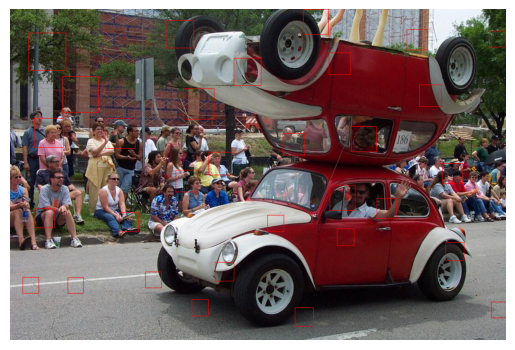

In [42]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

# Opening an image from the test set
image_path = df_test["image"]["path"][10]
image = Image.open(image_path)

# Invocation of the function that produces an image with red bounding boxes an plotting it
final_image = show_bounding_boxes_vj(image) 
plt.imshow(final_image)
plt.axis('off')  # Turn off axis ticks and labels
plt.show()

## Results and Statistics

Since we will apply the training phase multiple times, we have decided to *reduces again the number of rows* of the dataframe correspondent to the *training set*.

In [39]:
df_train_ViolaJones = take_first_rows_dataframe(df_train_ViolaJones, 1000)

Now we want to show a plot in which it take trace the ***trend of the execution time on the training phase*** with the ***number of steps of the models***. We also want to save the results in term of accuracy on the test set and the training set and the execution time of the prediction on the test set by the model

Step 0/0
Classifiers: 1000 / 136656
Classifiers: 2000 / 136656
Classifiers: 3000 / 136656
Classifiers: 4000 / 136656
Classifiers: 5000 / 136656
Classifiers: 6000 / 136656
Classifiers: 7000 / 136656
Classifiers: 8000 / 136656
Classifiers: 9000 / 136656
Classifiers: 10000 / 136656
Classifiers: 11000 / 136656
Classifiers: 12000 / 136656
Classifiers: 13000 / 136656
Classifiers: 14000 / 136656
Classifiers: 15000 / 136656
Classifiers: 16000 / 136656
Classifiers: 17000 / 136656
Classifiers: 18000 / 136656
Classifiers: 19000 / 136656
Classifiers: 20000 / 136656
Classifiers: 21000 / 136656
Classifiers: 22000 / 136656
Classifiers: 23000 / 136656
Classifiers: 24000 / 136656
Classifiers: 25000 / 136656
Classifiers: 26000 / 136656
Classifiers: 27000 / 136656
Classifiers: 28000 / 136656
Classifiers: 29000 / 136656
Classifiers: 30000 / 136656
Classifiers: 31000 / 136656
Classifiers: 32000 / 136656
Classifiers: 33000 / 136656
Classifiers: 34000 / 136656
Classifiers: 35000 / 136656
Classifiers: 36000 /

Classifiers: 19000 / 136656
Classifiers: 20000 / 136656
Classifiers: 21000 / 136656
Classifiers: 22000 / 136656
Classifiers: 23000 / 136656
Classifiers: 24000 / 136656
Classifiers: 25000 / 136656
Classifiers: 26000 / 136656
Classifiers: 27000 / 136656
Classifiers: 28000 / 136656
Classifiers: 29000 / 136656
Classifiers: 30000 / 136656
Classifiers: 31000 / 136656
Classifiers: 32000 / 136656
Classifiers: 33000 / 136656
Classifiers: 34000 / 136656
Classifiers: 35000 / 136656
Classifiers: 36000 / 136656
Classifiers: 37000 / 136656
Classifiers: 38000 / 136656
Classifiers: 39000 / 136656
Classifiers: 40000 / 136656
Classifiers: 41000 / 136656
Classifiers: 42000 / 136656
Classifiers: 43000 / 136656
Classifiers: 44000 / 136656
Classifiers: 45000 / 136656
Classifiers: 46000 / 136656
Classifiers: 47000 / 136656
Classifiers: 48000 / 136656
Classifiers: 49000 / 136656
Classifiers: 50000 / 136656
Classifiers: 51000 / 136656
Classifiers: 52000 / 136656
Classifiers: 53000 / 136656
Classifiers: 54000 /

Classifiers: 37000 / 136656
Classifiers: 38000 / 136656
Classifiers: 39000 / 136656
Classifiers: 40000 / 136656
Classifiers: 41000 / 136656
Classifiers: 42000 / 136656
Classifiers: 43000 / 136656
Classifiers: 44000 / 136656
Classifiers: 45000 / 136656
Classifiers: 46000 / 136656
Classifiers: 47000 / 136656
Classifiers: 48000 / 136656
Classifiers: 49000 / 136656
Classifiers: 50000 / 136656
Classifiers: 51000 / 136656
Classifiers: 52000 / 136656
Classifiers: 53000 / 136656
Classifiers: 54000 / 136656
Classifiers: 55000 / 136656
Classifiers: 56000 / 136656
Classifiers: 57000 / 136656
Classifiers: 58000 / 136656
Classifiers: 59000 / 136656
Classifiers: 60000 / 136656
Classifiers: 61000 / 136656
Classifiers: 62000 / 136656
Classifiers: 63000 / 136656
Classifiers: 64000 / 136656
Classifiers: 65000 / 136656
Classifiers: 66000 / 136656
Classifiers: 67000 / 136656
Classifiers: 68000 / 136656
Classifiers: 69000 / 136656
Classifiers: 70000 / 136656
Classifiers: 71000 / 136656
Classifiers: 72000 /

Classifiers: 55000 / 136656
Classifiers: 56000 / 136656
Classifiers: 57000 / 136656
Classifiers: 58000 / 136656
Classifiers: 59000 / 136656
Classifiers: 60000 / 136656
Classifiers: 61000 / 136656
Classifiers: 62000 / 136656
Classifiers: 63000 / 136656
Classifiers: 64000 / 136656
Classifiers: 65000 / 136656
Classifiers: 66000 / 136656
Classifiers: 67000 / 136656
Classifiers: 68000 / 136656
Classifiers: 69000 / 136656
Classifiers: 70000 / 136656
Classifiers: 71000 / 136656
Classifiers: 72000 / 136656
Classifiers: 73000 / 136656
Classifiers: 74000 / 136656
Classifiers: 75000 / 136656
Classifiers: 76000 / 136656
Classifiers: 77000 / 136656
Classifiers: 78000 / 136656
Classifiers: 79000 / 136656
Classifiers: 80000 / 136656
Classifiers: 81000 / 136656
Classifiers: 82000 / 136656
Classifiers: 83000 / 136656
Classifiers: 84000 / 136656
Classifiers: 85000 / 136656
Classifiers: 86000 / 136656
Classifiers: 87000 / 136656
Classifiers: 88000 / 136656
Classifiers: 89000 / 136656
Classifiers: 90000 /

Classifiers: 73000 / 136656
Classifiers: 74000 / 136656
Classifiers: 75000 / 136656
Classifiers: 76000 / 136656
Classifiers: 77000 / 136656
Classifiers: 78000 / 136656
Classifiers: 79000 / 136656
Classifiers: 80000 / 136656
Classifiers: 81000 / 136656
Classifiers: 82000 / 136656
Classifiers: 83000 / 136656
Classifiers: 84000 / 136656
Classifiers: 85000 / 136656
Classifiers: 86000 / 136656
Classifiers: 87000 / 136656
Classifiers: 88000 / 136656
Classifiers: 89000 / 136656
Classifiers: 90000 / 136656
Classifiers: 91000 / 136656
Classifiers: 92000 / 136656
Classifiers: 93000 / 136656
Classifiers: 94000 / 136656
Classifiers: 95000 / 136656
Classifiers: 96000 / 136656
Classifiers: 97000 / 136656
Classifiers: 98000 / 136656
Classifiers: 99000 / 136656
Classifiers: 100000 / 136656
Classifiers: 101000 / 136656
Classifiers: 102000 / 136656
Classifiers: 103000 / 136656
Classifiers: 104000 / 136656
Classifiers: 105000 / 136656
Classifiers: 106000 / 136656
Classifiers: 107000 / 136656
Classifiers:

C:\Users\lita4\AppData\Local\Temp\ipykernel_23304\1444664209.py:25: RuntimeWarning: overflow encountered in ulong_scalars
  integral_image[i, j] = (image[i, j] + integral_image[i-1, j] + integral_image[i, j-1] - integral_image[i-1, j-1])


Step 0/0
Classifiers: 1000 / 136656
Classifiers: 2000 / 136656
Classifiers: 3000 / 136656
Classifiers: 4000 / 136656
Classifiers: 5000 / 136656
Classifiers: 6000 / 136656
Classifiers: 7000 / 136656
Classifiers: 8000 / 136656
Classifiers: 9000 / 136656
Classifiers: 10000 / 136656
Classifiers: 11000 / 136656
Classifiers: 12000 / 136656
Classifiers: 13000 / 136656
Classifiers: 14000 / 136656
Classifiers: 15000 / 136656
Classifiers: 16000 / 136656
Classifiers: 17000 / 136656
Classifiers: 18000 / 136656
Classifiers: 19000 / 136656
Classifiers: 20000 / 136656
Classifiers: 21000 / 136656
Classifiers: 22000 / 136656
Classifiers: 23000 / 136656
Classifiers: 24000 / 136656
Classifiers: 25000 / 136656
Classifiers: 26000 / 136656
Classifiers: 27000 / 136656
Classifiers: 28000 / 136656
Classifiers: 29000 / 136656
Classifiers: 30000 / 136656
Classifiers: 31000 / 136656
Classifiers: 32000 / 136656
Classifiers: 33000 / 136656
Classifiers: 34000 / 136656
Classifiers: 35000 / 136656
Classifiers: 36000 /

Classifiers: 19000 / 136656
Classifiers: 20000 / 136656
Classifiers: 21000 / 136656
Classifiers: 22000 / 136656
Classifiers: 23000 / 136656
Classifiers: 24000 / 136656
Classifiers: 25000 / 136656
Classifiers: 26000 / 136656
Classifiers: 27000 / 136656
Classifiers: 28000 / 136656
Classifiers: 29000 / 136656
Classifiers: 30000 / 136656
Classifiers: 31000 / 136656
Classifiers: 32000 / 136656
Classifiers: 33000 / 136656
Classifiers: 34000 / 136656
Classifiers: 35000 / 136656
Classifiers: 36000 / 136656
Classifiers: 37000 / 136656
Classifiers: 38000 / 136656
Classifiers: 39000 / 136656
Classifiers: 40000 / 136656
Classifiers: 41000 / 136656
Classifiers: 42000 / 136656
Classifiers: 43000 / 136656
Classifiers: 44000 / 136656
Classifiers: 45000 / 136656
Classifiers: 46000 / 136656
Classifiers: 47000 / 136656
Classifiers: 48000 / 136656
Classifiers: 49000 / 136656
Classifiers: 50000 / 136656
Classifiers: 51000 / 136656
Classifiers: 52000 / 136656
Classifiers: 53000 / 136656
Classifiers: 54000 /

Classifiers: 37000 / 136656
Classifiers: 38000 / 136656
Classifiers: 39000 / 136656
Classifiers: 40000 / 136656
Classifiers: 41000 / 136656
Classifiers: 42000 / 136656
Classifiers: 43000 / 136656
Classifiers: 44000 / 136656
Classifiers: 45000 / 136656
Classifiers: 46000 / 136656
Classifiers: 47000 / 136656
Classifiers: 48000 / 136656
Classifiers: 49000 / 136656
Classifiers: 50000 / 136656
Classifiers: 51000 / 136656
Classifiers: 52000 / 136656
Classifiers: 53000 / 136656
Classifiers: 54000 / 136656
Classifiers: 55000 / 136656
Classifiers: 56000 / 136656
Classifiers: 57000 / 136656
Classifiers: 58000 / 136656
Classifiers: 59000 / 136656
Classifiers: 60000 / 136656
Classifiers: 61000 / 136656
Classifiers: 62000 / 136656
Classifiers: 63000 / 136656
Classifiers: 64000 / 136656
Classifiers: 65000 / 136656
Classifiers: 66000 / 136656
Classifiers: 67000 / 136656
Classifiers: 68000 / 136656
Classifiers: 69000 / 136656
Classifiers: 70000 / 136656
Classifiers: 71000 / 136656
Classifiers: 72000 /

Classifiers: 55000 / 136656
Classifiers: 56000 / 136656
Classifiers: 57000 / 136656
Classifiers: 58000 / 136656
Classifiers: 59000 / 136656
Classifiers: 60000 / 136656
Classifiers: 61000 / 136656
Classifiers: 62000 / 136656
Classifiers: 63000 / 136656
Classifiers: 64000 / 136656
Classifiers: 65000 / 136656
Classifiers: 66000 / 136656
Classifiers: 67000 / 136656
Classifiers: 68000 / 136656
Classifiers: 69000 / 136656
Classifiers: 70000 / 136656
Classifiers: 71000 / 136656
Classifiers: 72000 / 136656
Classifiers: 73000 / 136656
Classifiers: 74000 / 136656
Classifiers: 75000 / 136656
Classifiers: 76000 / 136656
Classifiers: 77000 / 136656
Classifiers: 78000 / 136656
Classifiers: 79000 / 136656
Classifiers: 80000 / 136656
Classifiers: 81000 / 136656
Classifiers: 82000 / 136656
Classifiers: 83000 / 136656
Classifiers: 84000 / 136656
Classifiers: 85000 / 136656
Classifiers: 86000 / 136656
Classifiers: 87000 / 136656
Classifiers: 88000 / 136656
Classifiers: 89000 / 136656
Classifiers: 90000 /

Classifiers: 73000 / 136656
Classifiers: 74000 / 136656
Classifiers: 75000 / 136656
Classifiers: 76000 / 136656
Classifiers: 77000 / 136656
Classifiers: 78000 / 136656
Classifiers: 79000 / 136656
Classifiers: 80000 / 136656
Classifiers: 81000 / 136656
Classifiers: 82000 / 136656
Classifiers: 83000 / 136656
Classifiers: 84000 / 136656
Classifiers: 85000 / 136656
Classifiers: 86000 / 136656
Classifiers: 87000 / 136656
Classifiers: 88000 / 136656
Classifiers: 89000 / 136656
Classifiers: 90000 / 136656
Classifiers: 91000 / 136656
Classifiers: 92000 / 136656
Classifiers: 93000 / 136656
Classifiers: 94000 / 136656
Classifiers: 95000 / 136656
Classifiers: 96000 / 136656
Classifiers: 97000 / 136656
Classifiers: 98000 / 136656
Classifiers: 99000 / 136656
Classifiers: 100000 / 136656
Classifiers: 101000 / 136656
Classifiers: 102000 / 136656
Classifiers: 103000 / 136656
Classifiers: 104000 / 136656
Classifiers: 105000 / 136656
Classifiers: 106000 / 136656
Classifiers: 107000 / 136656
Classifiers:

Classifiers: 91000 / 136656
Classifiers: 92000 / 136656
Classifiers: 93000 / 136656
Classifiers: 94000 / 136656
Classifiers: 95000 / 136656
Classifiers: 96000 / 136656
Classifiers: 97000 / 136656
Classifiers: 98000 / 136656
Classifiers: 99000 / 136656
Classifiers: 100000 / 136656
Classifiers: 101000 / 136656
Classifiers: 102000 / 136656
Classifiers: 103000 / 136656
Classifiers: 104000 / 136656
Classifiers: 105000 / 136656
Classifiers: 106000 / 136656
Classifiers: 107000 / 136656
Classifiers: 108000 / 136656
Classifiers: 109000 / 136656
Classifiers: 110000 / 136656
Classifiers: 111000 / 136656
Classifiers: 112000 / 136656
Classifiers: 113000 / 136656
Classifiers: 114000 / 136656
Classifiers: 115000 / 136656
Classifiers: 116000 / 136656
Classifiers: 117000 / 136656
Classifiers: 118000 / 136656
Classifiers: 119000 / 136656
Classifiers: 120000 / 136656
Classifiers: 121000 / 136656
Classifiers: 122000 / 136656
Classifiers: 123000 / 136656
Classifiers: 124000 / 136656
Classifiers: 125000 / 1

Classifiers: 109000 / 136656
Classifiers: 110000 / 136656
Classifiers: 111000 / 136656
Classifiers: 112000 / 136656
Classifiers: 113000 / 136656
Classifiers: 114000 / 136656
Classifiers: 115000 / 136656
Classifiers: 116000 / 136656
Classifiers: 117000 / 136656
Classifiers: 118000 / 136656
Classifiers: 119000 / 136656
Classifiers: 120000 / 136656
Classifiers: 121000 / 136656
Classifiers: 122000 / 136656
Classifiers: 123000 / 136656
Classifiers: 124000 / 136656
Classifiers: 125000 / 136656
Classifiers: 126000 / 136656
Classifiers: 127000 / 136656
Classifiers: 128000 / 136656
Classifiers: 129000 / 136656
Classifiers: 130000 / 136656
Classifiers: 131000 / 136656
Classifiers: 132000 / 136656
Classifiers: 133000 / 136656
Classifiers: 134000 / 136656
Classifiers: 135000 / 136656
Classifiers: 136000 / 136656

Step 7/9
Classifiers: 1000 / 136656
Classifiers: 2000 / 136656
Classifiers: 3000 / 136656
Classifiers: 4000 / 136656
Classifiers: 5000 / 136656
Classifiers: 6000 / 136656
Classifiers: 700

Classifiers: 127000 / 136656
Classifiers: 128000 / 136656
Classifiers: 129000 / 136656
Classifiers: 130000 / 136656
Classifiers: 131000 / 136656
Classifiers: 132000 / 136656
Classifiers: 133000 / 136656
Classifiers: 134000 / 136656
Classifiers: 135000 / 136656
Classifiers: 136000 / 136656

Step 9/9
Classifiers: 1000 / 136656
Classifiers: 2000 / 136656
Classifiers: 3000 / 136656
Classifiers: 4000 / 136656
Classifiers: 5000 / 136656
Classifiers: 6000 / 136656
Classifiers: 7000 / 136656
Classifiers: 8000 / 136656
Classifiers: 9000 / 136656
Classifiers: 10000 / 136656
Classifiers: 11000 / 136656
Classifiers: 12000 / 136656
Classifiers: 13000 / 136656
Classifiers: 14000 / 136656
Classifiers: 15000 / 136656
Classifiers: 16000 / 136656
Classifiers: 17000 / 136656
Classifiers: 18000 / 136656
Classifiers: 19000 / 136656
Classifiers: 20000 / 136656
Classifiers: 21000 / 136656
Classifiers: 22000 / 136656
Classifiers: 23000 / 136656
Classifiers: 24000 / 136656
Classifiers: 25000 / 136656
Classifie

C:\Users\lita4\AppData\Local\Temp\ipykernel_23304\1444664209.py:25: RuntimeWarning: overflow encountered in ulong_scalars
  integral_image[i, j] = (image[i, j] + integral_image[i-1, j] + integral_image[i, j-1] - integral_image[i-1, j-1])


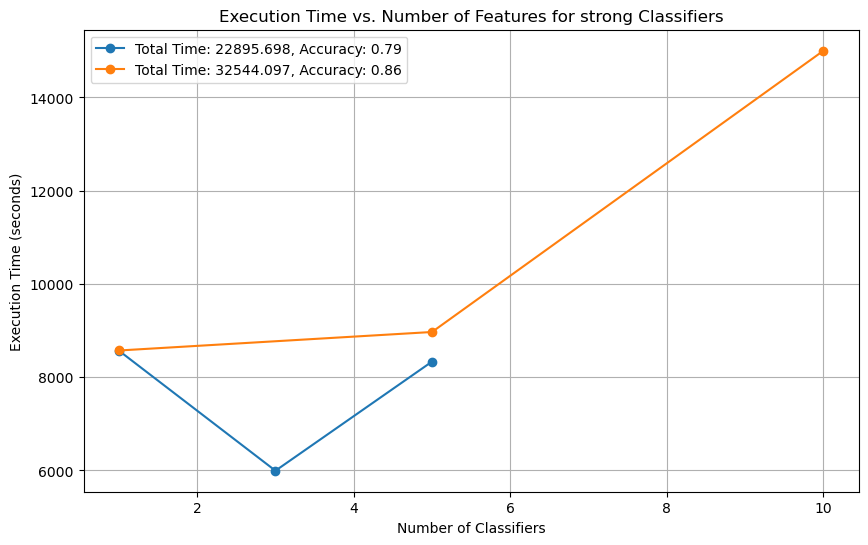

In [40]:
import matplotlib.pyplot as plt
import time
from tabulate import tabulate
  

"""
Function that, given the list of lists of the steps t and the dataframe of the training set, it produces a number of Viola
and Jones model equal to the lists into the step_lists variable. It trains these models with the steps of the list and the
dataframe of the training set and it extracts the results for each model: the running time and the accuracies of the training
phase and the test phase.
This function returns the lists of the results for each produced Viola and Jones model
"""
def calculate_results_model(steps_list, df_train_ViolaJones):
    
    # Initializing as empty lists all the lists that will contain results
    total_time_steps = []     
    total_time_training = [] 
    total_time_testing = []    
    accuracy_training_list = []
    accuracy_testing_list = []  
    
    # Loop over the list of lists which contains the t steps of all the model that will be built and trained
    for step in steps_list: 
        
        # Training the new Viola and Jones model and extracting the running time
        start_time_training = time.time()  
        total_clfs, total_alphas, time_steps = trainCascade(step, df_train_ViolaJones)
        total_time_steps.append(time_steps)        
        end_time_training  = time.time()         
        execution_time_training = end_time_training - start_time_training
        total_time_training.append(execution_time_training)  
        
        # Testing the model to the training set and extracting the accuracy     
        y_pred_training = predictions_cascade(total_clfs, total_alphas, df_train_ViolaJones)
        result_training = computing_accuracy_cascade(df_train_ViolaJones, y_pred_training)        
        accuracy_training_list.append(result_training)
                
        # Testing the model to the test set and extracting the accuracy and the test time      
        start_time_testing = time.time()
        y_pred_testing = predictions_cascade(total_clfs, total_alphas, df_test_ViolaJones)
        result_testing = computing_accuracy_cascade(df_test_ViolaJones, y_pred_testing)        
        accuracy_testing_list.append(result_testing)
        end_time_testing = time.time()
        execution_time_testing = end_time_testing - start_time_testing        
        total_time_testing.append(execution_time_testing)
        
    # Returning all the list containing the results
    return total_time_steps, total_time_training, total_time_testing, accuracy_training_list, accuracy_testing_list


"""
Function that plots the trends of the execution time by changing the t steps. 
It takes in input the list of lists of the models' steps, the lists containing the execution time taken from each step during
the training phase and the final accuracy of the models
"""
def plot_results(steps_list, list_time, accuracy):
    
    # Application of the size of the plot
    plt.figure(figsize=(10, 6))
    
    # Loop over the list of lists which contains the t steps of all the model that will be built and trained
    for steps, t in zip(steps_list, list_time):        
        plt.plot(steps, t, marker='o')
        
    # Inserting the labels and the title of the plots
    plt.xlabel('Number of Classifiers')
    plt.ylabel('Execution Time (seconds)')    
    plt.title('Execution Time vs. Number of Features for strong Classifiers')
    plt.grid(True)
    
    # Inserting the legends of the plot
    legends = ['Total Time: {:.3f}, Accuracy: {:.2f}'.format(sum(t), acc) for t, acc in zip(list_time, accuracy)]    
    plt.legend(legends, loc='best')
    
    # Showing the plot
    plt.show()

    
# Composing the list of lists of steps, invocation of the functions that prints the results on the model and then printing the plot
steps_list = [[1, 3, 5], [1, 5, 10]]
total_time_steps, total_time_training,total_time_testing, accuracy_training_list, accuracy_testing_list = calculate_results_model(steps_list)
plot_results(steps_list, total_time_steps, accuracy_training_list)

Now we can finally check the results on the test phase such as ***execution time*** and ***accuracy*** by fixing the training set and the list of lists of steps taken by the *Viola and Jones* model.
So, we have decided to implement a function that shows all the results of all the models into a **unique table**.

In [41]:
from tabulate import tabulate


"""
Function that prints a table in which, for each model produced by a different number of t steps, it shows the time of the 
training phase, the accuracy of the model on the element of the training set, the time for the predictions on the test set,
the accuracy of the model and the training set 
"""
def creare_table_results(steps_list,total_time_steps, total_time_training,total_time_testing, accuracy_training_list, accuracy_testing_list, df_train_ViolaJones):
    
    # Initializing the rows variable
    rows = []

    # Inserting all the lists into the rows variable
    for i in range(0,len(steps_list)):
        rows.append((steps_list[i], total_time_training[i], total_time_testing[i], accuracy_training_list[i],accuracy_testing_list[i]))

    # Adding headings of the table
    headers = ['Number T steps', 'Training Time', 'Testing Time', 'Training Accuracy', 'Testing Accuracy']

    # Creation of the formatted table
    table = tabulate(rows, headers=headers, tablefmt='grid')

    # Adding the title
    title = "Results with " + str(len(df_train_ViolaJones)) + "elements of training set"
    table = f"{title}\n\n{table}"

    # Printing the table
    print(table)

    
# Invocation of the functions that prints the table
creare_table_results(steps_list,total_time_steps, total_time_training,total_time_testing, accuracy_training_list, accuracy_testing_list)

Results and Statistics with 1000 elements of training set

+------------------+-----------------+----------------+---------------------+--------------------+
| Number T steps   |   Training Time |   Testing Time |   Training Accuracy |   Testing Accuracy |
+==================+=================+================+=====================+====================+
| [1, 3, 5]        |         22895.7 |         14.909 |               0.793 |           0.802938 |
+------------------+-----------------+----------------+---------------------+--------------------+
| [1, 5, 10]       |         32544.1 |         15.271 |               0.858 |           0.930435 |
+------------------+-----------------+----------------+---------------------+--------------------+
